In [1]:
# ---------------- #
# Common Libraries #
# ---------------- #
      
# Standard Imports
import os
import re
import nltk
import requests
import unicodedata
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

## setting basic style parameters for matplotlib
plt.rc('figure', figsize=(20, 10))
plt.style.use('seaborn-darkgrid')

# ------------- #
# LOCAL IMPORTS #
# ------------- #

# importing sys
import sys
# adding 00_helper_files to the system path
sys.path.insert(0, '/Users/qmcbt/codeup-data-science/00_helper_files')
# env containing sensitive access credentials
import env
from env import user, password, host
from env import get_db_url

# Import Local Helper Modules
import QMCBT_00_quicktips as qt
import QMCBT_01_acquire as acq
import QMCBT_02_prepare as prep
import QMCBT_03_explore as exp
import QMCBT_04_visualize as viz
import QMCBT_05_model as mod
import QMCBT_wrangle as w

# Import py modules
import prepare as p

In [2]:
# Read-in data from compressed file
df = pd.read_pickle('michelin_df.pickle')

In [3]:
# Display DataFrame
df.T.head(20)

,0,1,2,3,4,5,6,7,8,9,...,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779
name,King's Joy,Xin Rong Ji (Xinyuan South Road),Taian Table,Ultraviolet by Paul Pairet,Quince,Atelier Crenn,Addison,Manresa,Benu,SingleThread,...,Mimo,A Casa do Porco,Più Iguatemi,Bistrot de Paris,AE! Cozinha,Szóstka,Fiorentina,Zazie,Butchery & Wine,alewino
address,"2 Wudaoying Hutong, Beijing, China Mainland","1F, East Tower, Genesis Beijing, 8 Xinyuan Sou...","101-102, Building No. 1, Garden Office, No.161...",'somewhere in Shanghai' - meet at Mr & Mrs Bun...,"470 Pacific Ave., San Francisco, 94133, USA","3127 Fillmore St., San Francisco, 94123, USA","5200 Grand Del Mar Way, San Diego, 92130, USA","320 Village Ln., Los Gatos, 95030, USA","22 Hawthorne St., San Francisco, 94105, USA","131 North St., Healdsburg, 95448, USA",...,"Rua Caconde 118, São Paulo, 01425-010, Brazil","Rua Araujo 124, São Paulo, 01220-020, Brazil","Avenida Brigadeiro Faria Lima 2232, São Paulo,...","Rua Augusta 2542, São Paulo, 01412-100, Brazil","Rua Áurea 285, São Paulo, 04015-070, Brazil","Plac Powstańców Warszawy 9, Warsaw, 00 039, Po...","ul. Grodzka 63, Cracow, 31 044, Poland","ul. Józefa 34, Cracow, 32 056, Poland","ul. Żurawia 22, Warsaw, 00 515, Poland","ul. Mokotowska 48, Warsaw, 00 543, Poland"
location,"Beijing, China Mainland","Beijing, China Mainland","Shanghai, China Mainland","Shanghai, China Mainland","San Francisco, USA","San Francisco, USA","San Diego, USA","Los Gatos, USA","San Francisco, USA","Healdsburg, USA",...,"São Paulo, Brazil","São Paulo, Brazil","São Paulo, Brazil","São Paulo, Brazil","São Paulo, Brazil","Warsaw, Poland","Cracow, Poland","Cracow, Poland","Warsaw, Poland","Warsaw, Poland"
price,¥¥¥,¥¥¥¥,¥¥¥¥,¥¥¥¥,$$$$,$$$$,$$$$,$$$$,$$$$,$$$$,...,NaN,NaN,NaN,NaN,NaN,€€,€€,€,€€,€€
cuisine,Vegetarian,Taizhou,Innovative,Innovative,"Contemporary, Californian","Contemporary, French","Contemporary, Californian","Contemporary, Californian","Asian, Contemporary","Contemporary, Californian",...,Modern Cuisine,Brazilian,"Italian, Creative",French,"Creative, Market Cuisine","Polish, Modern Cuisine","Creative, Polish",French,"Meats and Grills, Traditional Cuisine","Polish, Traditional Cuisine"
longitude,116.410004,116.450148,121.474049,121.48509,-122.403261,-122.43586,-117.198891,-121.98071,-122.39906,-122.869723,...,-46.658201,-46.644742,-46.688315,-46.665519,-46.645587,21.012698,19.938179,19.946949,21.015495,21.022057
latitude,39.946681,39.94638,31.221807,31.240358,37.797505,37.79835,32.941297,37.22761,37.785376,38.61226,...,-23.574572,-23.544867,-23.577106,-23.563072,-23.586913,52.235803,50.055898,50.05124,52.228581,52.225201
phone_number,861084049191.0,861065015501.0,8617301605350.0,NaN,14157758500.0,14154400460.0,18583141900.0,14083544330.0,14156854860.0,17077234646.0,...,551130522517.0,551132582578.0,551131987649.0,551130631675.0,551134768521.0,48224700342.0,48124264608.0,48500410829.0,48225023118.0,48226283830.0
url,https://guide.michelin.com/en/beijing-municipa...,https://guide.michelin.com/en/beijing-municipa...,https://guide.michelin.com/en/shanghai-municip...,https://guide.michelin.com/en/shanghai-municip...,https://guide.michelin.com/en/california/san-f...,https://guide.michelin.com/en/california/san-f...,https://guide.michelin.com/en/california/us-sa...,https://guide.michelin.com/en/california/los-g...,https://guide.michelin.com/en/california/san-f...,https://guide.michelin.com/en/california/heald...,...,https://guide.michelin.com/en/sao-paulo-region...,https://guide.michelin.com/en/sao-paulo-region...,https://guide.michelin.com/en/sao-paulo-region...,https://guide.michelin.com/en/sao-paulo-region...,https://guide.michelin.com/en/sao-paulo-region...,https://guide.michelin.com/en/masovia/warsaw/r...,https://guide.michelin.com/en/lesser-poland/cr...,https://guide.michelin.com/en/lesser-poland/cr...,https://guide.michelin.com/en/masovia/warsaw/r...,https://guide.michelin.com/en/masovia/warsaw/r...
website_url,NaN,NaN,https://taian-table.cn/,https://uvby

In [4]:
train, validate, test = p.prepare_michelin(df)

In [5]:
train.T.head(20)

,3016,1802,91,5283,1424,1037,5219,5038,1538,2376,...,1293,225,4615,1841,3503,370,2501,411,6367,1195
name,rüssel's landhaus,iroha,kei,famous sungei road trishaw laksa,magorabin,ristorante honda,old new taiwanese cuisine (jiuru 2nd road),hachidori,denis martin,pertinence,...,il tiglio,seizan,café du levant,ad hoc,corazon cocina,l'atelier de joël robuchon,l'aquarelle,fred,gehrlein's hardtwald,osteria di passignano
address,"büdlicherbrück 1, naurath/wald, 54426, germany","5f, 1-3-19 sonezakishinchi, kita-ku, osaka, 53...","5 rue du coq-héron, paris, 75001, france","hong lim market and food centre, #02-66, blk 5...","corso san maurizio 61/d, turin, 10124, italy","2-12-35 kitaaoyama, minato-ku, tokyo, 107-0061...","227 jiuru 2nd road, sanmin district, kaohsiung...","1-20-2 miyakojimakitadori, miyakojima-ku, osak...","rue du château 2, vevey, 1800, switzerland","29 rue de l'exposition, paris, 75007, france",...,"via isola san biagio 34, montemonaco, 63088, i...","b1f, 2-17-29 mita, minato-ku, tokyo, 108-0073,...","rue du vieux four 53, aire-la-ville, 1288, swi...","hotarumachi, 1-1-48 fukushima, fukushima-ku, o...","38 w. victoria st., santa barbara, 93101, usa","5f, bellavita, 28 songren road, xinyi district...","71a route du montil, breuillet, 17920, france","honingerdijk 263, rotterdam, 3063 am, netherlands","sandhohl 14, neupotz, 76777, germany","via passignano 33, passignano, 50028, italy"
location,"naurath/wald, germany","osaka, japan","paris, france",singapore,"turin, italy","tokyo, japan","kaohsiung, taipei & taichung","osaka, japan","vevey, switzerland","paris, france",...,"montemonaco, italy","tokyo, japan","aire-la-ville, switzerland","osaka, japan","santa barbara, usa","taipei, taipei & taichung","breuillet, france","rotterdam, netherlands","neupotz, germany","passignano, italy"
price,€€€€,¥¥¥,€€€€,$,€€€,¥¥¥,$$,¥¥,€€€€,€€€€,...,€€€,¥¥¥¥,€€,¥¥¥,$$,$$$$,€€€,€€€€,€€,€€€€
cuisine,"creative, market cuisine",japanese,modern cuisine,street food,"creative, contemporary",italian,taiwanese,izakaya,creative,modern cuisine,...,"contemporary, cuisine from the marches",japanese,"french, market cuisine",french,"mexican, seafood",french contemporary,creative,creative french,"country cooking, international",modern cuisine
longitude,6.892007,135.495812,2.342285,103.845742,7.696044,139.714445,120.30723,135.529216,6.8486,2.303377,...,13.316814,139.739956,6.043185,135.489048,-119.707064,121.56814,-1.039757,4.517772,8.313107,11.245811
latitude,49.768126,34.697842,48.864395,1.28518,45.068465,35.670294,22.64087,34.711264,46.458391,48.857171,...,42.918238,35.64743,46.191267,34.694133,34.423597,25.039609,45.685875,51.917004,49.122129,43.576867
url,https://guide.michelin.com/en/rheinland-pfalz/...,https://guide.michelin.com/en/osaka-region/osa...,https://guide.michelin.com/en/ile-de-france/pa...,https://guide.michelin.com/en/singapore-region...,https://guide.michelin.com/en/piemonte/torino/...,https://guide.michelin.com/en/tokyo-region/tok...,https://guide.michelin.com/en/kaohsiung-region...,https://guide.michelin.com/en/osaka-region/osa...,https://guide.michelin.com/en/vaud/vevey/resta...,https://guide.michelin.com/en/ile-de-france/pa...,...,https://guide.michelin.com/en/marche/montemona...,https://guide.michelin.com/en/tokyo-region/tok...,https://guide.michelin.com/en/geneve-region/ai...,https://guide.michelin.com/en/osaka-region/osa...,https://guide.michelin.com/en/california/santa...,https://guide.michelin.com/en/taipei-region/ta...,https://guide.michelin.com/en/nouvelle-aquitai...,https://guide.michelin.com/en/zuid-holland/rot...,https://guide.michelin.com/en/rheinland-pfalz/...,https://guide.michelin.com/en/toscana/passigna...
award,1 michelin star,1 michelin star,3 michelin stars,bib gourmand,1 michelin star,1 michelin star,bib gourmand,bib gourmand,1 michelin star,1 michelin star,...,1 michelin star,2 michelin stars,bib gourmand,1 michelin star,bib gourmand,2 michelin stars,1 michelin star,2 michelin stars,bib gourmand,1 michelin star
facil

In [6]:
# Display DataFrame information
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3796 entries, 3016 to 1195
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     3796 non-null   string 
 1   address                  3796 non-null   string 
 2   location                 3796 non-null   string 
 3   price                    3796 non-null   object 
 4   cuisine                  3796 non-null   string 
 5   longitude                3796 non-null   float64
 6   latitude                 3796 non-null   float64
 7   url                      3796 non-null   object 
 8   award                    3796 non-null   string 
 9   facilities_and_services  3796 non-null   string 
 10  data                     3796 non-null   string 
 11  price_level              3796 non-null   int64  
 12  city                     3796 non-null   object 
 13  country                  3796 non-null   object 
 14  clean                

<div class="alert alert-info">

# Observations
* Dropping all nulls would remove 1336 documents (~135 documents have >1 Null)  

                          price:   54 Nulls
                   phone_number:  131 Nulls
                    website_url: 1238 Nulls
        facilities_and_services:   48 Nulls

* facilities_and_services nunique is 1571 

        * there are only 120 documents that share values with 10 or more other documents
        * there are 540 documents that share values with 2-9 other documents
        * there are 910 documents that are entirely unique

* There are only 16 locations that have more than 50 documents (awardees) and only half of those contain more than 100 documents  

        * Tokyo, Japan                    422
        * Kyoto, Japan                    196
        * Osaka, Japan                    193
        * New York, USA                   177
        * Paris, France                   164
        * Hong Kong                       135
        * Singapore                       119
        * London, United Kingdom          104
        * Bangkok, Thailand               103

* There are 863 unique cuisine values; 26 cuisine types that have more than 50 documents and only 9 that have more than 100 documents; 445 unique cuisine type combinations have only one document.  
        
        * Modern Cuisine              994
        * Creative                    416
        * Japanese                    287
        * Traditional Cuisine         218
        * French                      184
        * Street Food                 157
        * Italian                     130
        * Contemporary                114
        * Cantonese                   112

* There are four different award types  

        * Bib Gourmand        3411
        * 1 MICHELIN Star     2744
        * 2 MICHELIN Stars     483
        * 3 MICHELIN Stars     142

# Clean
### DTYPE & IMPUTE
* Cast facilities_and_services astype('string') and fillna('NONE')
* Cast data astype('string')

# Feature Engineer
* NON-MVP Option - Create buckets and encode locations and cuisine
* Encode award 
* Use facilities_and_services as a feature
* IMPUTE prce with len and encode


In [7]:
# Display count of unique entries
train.facilities_and_services.nunique()

1127

In [8]:
# Show aggregated value counts
train.facilities_and_services.value_counts().head(435)

air conditioning,american express credit card,...    149
cash only                                             88
air conditioning,credit card / debit card acce...     81
air conditioning,american express credit card,...     73
credit card / debit card accepted,mastercard c...     72
                                                    ... 
credit card / debit card accepted,mastercard c...      2
american express credit card,credit card / deb...      2
particularly interesting wine list,valet parking       2
air conditioning,american express credit card,...      1
air conditioning,american express credit card,...      1
Name: facilities_and_services, Length: 435, dtype: Int64

## Award & Price Comparisons 

In [9]:
# Award Counts
train.award.value_counts()

bib gourmand        1910
1 michelin star     1536
2 michelin stars     270
3 michelin stars      80
Name: award, dtype: Int64

In [10]:
# Award Percentages
print(f'Bib Gourmand: {1910/3796}')
print(f'      1-Star: {1536/3796}')
print(f'      2-Star: {270/3796}')
print(f'      3-Star: {80/3796}')

Bib Gourmand: 0.5031612223393045
      1-Star: 0.40463645943098
      2-Star: 0.07112750263435196
      3-Star: 0.02107481559536354


In [11]:
# Price Count
train.price_level.value_counts()

2    1373
4    1025
3     815
1     583
Name: price_level, dtype: int64

In [12]:
# Price Percentages
print(f'Price Level 1: {583/3796}')
print(f'Price Level 2: {1373/3796}')
print(f'Price Level 3: {815/3796}')
print(f'Price Level 4: {1025/3796}')

Price Level 1: 0.1535827186512118
Price Level 2: 0.3616965226554268
Price Level 3: 0.21469968387776606
Price Level 4: 0.27002107481559534


#### Bib Gourmand

In [13]:
# Bib Gourmand Price Count
train.price_level[train.award == 'bib gourmand'].value_counts()

2    1300
1     580
3      29
4       1
Name: price_level, dtype: int64

In [14]:
# Price Percentages
print(f'Bib Gourmand Price Level 1: {1300/1373}')
print(f'Bib Gourmand Price Level 2: {580/583}')
print(f'Bib Gourmand Price Level 3: {29/815}')
print(f'Bib Gourmand Price Level 4: {1/1025}')
print('------------------------------------------------------------------')
print(f'Bib Gourmand Percentage of Total: {(1300+580+29+1)/(1373+583+815+1025)}')

Bib Gourmand Price Level 1: 0.9468317552804079
Bib Gourmand Price Level 2: 0.9948542024013722
Bib Gourmand Price Level 3: 0.03558282208588957
Bib Gourmand Price Level 4: 0.000975609756097561
------------------------------------------------------------------
Bib Gourmand Percentage of Total: 0.5031612223393045


#### 1-Star

In [15]:
# Price Count
train.price_level[train.award == '1 michelin star'].value_counts()

3    747
4    719
2     67
1      3
Name: price_level, dtype: int64

In [16]:
# Price Percentages
print(f'1 Star Price Level 1: {3/1373}')
print(f'1 Star Price Level 2: {67/583}')
print(f'1 Star Price Level 3: {747/815}')
print(f'1 Star Price Level 4: {719/1025}')
print('------------------------------------------------------------------')
print(f'1 Star Percentage of Total: {(3+67+747+719)/(1373+583+815+1025)}')

1 Star Price Level 1: 0.0021849963583394027
1 Star Price Level 2: 0.11492281303602059
1 Star Price Level 3: 0.9165644171779141
1 Star Price Level 4: 0.7014634146341463
------------------------------------------------------------------
1 Star Percentage of Total: 0.40463645943098


#### 2-Star

In [17]:
# Price Count
train.price_level[train.award == '2 michelin stars'].value_counts()

4    229
3     35
2      6
Name: price_level, dtype: int64

In [18]:
# Price Percentages
print(f'2 Star Price Level 1: {0/1373}')
print(f'2 Star Price Level 2: {6/583}')
print(f'2 Star Price Level 3: {35/815}')
print(f'2 Star Price Level 4: {229/1025}')
print('------------------------------------------------------------------')
print(f'2 Star Percentage of Total: {(0+6+35+229)/(1373+583+815+1025)}')

2 Star Price Level 1: 0.0
2 Star Price Level 2: 0.010291595197255575
2 Star Price Level 3: 0.04294478527607362
2 Star Price Level 4: 0.22341463414634147
------------------------------------------------------------------
2 Star Percentage of Total: 0.07112750263435196


#### 3-Star

In [19]:
# Price Count
train.price_level[train.award == '3 michelin stars'].value_counts()

4    76
3     4
Name: price_level, dtype: int64

In [20]:
# Price Percentages
print(f'3 Star Price Level 1: {0/1373}')
print(f'3 Star Price Level 2: {0/583}')
print(f'3 Star Price Level 3: {4/815}')
print(f'3 Star Price Level 4: {76/1025}')
print('------------------------------------------------------------------')
print(f'3 Star Percentage of Total: {(0+0+4+76)/(1373+583+815+1025)}')

3 Star Price Level 1: 0.0
3 Star Price Level 2: 0.0
3 Star Price Level 3: 0.0049079754601227
3 Star Price Level 4: 0.07414634146341463
------------------------------------------------------------------
3 Star Percentage of Total: 0.02107481559536354


## Cuisine

In [21]:
train.cuisine.nunique()

655

In [22]:
# cuisine counts > 50
train.cuisine.value_counts().head(11)

modern cuisine         552
creative               216
japanese               142
traditional cuisine    114
french                 102
street food             98
italian                 73
contemporary            65
cantonese               57
classic cuisine         51
modern french           46
Name: cuisine, dtype: Int64

## Locations

In [23]:
# Unique of locations
train.location.nunique()

1673

In [24]:
# location counts > 50
train.location.value_counts().head(11)

tokyo, japan              202
osaka, japan              116
new york, usa             107
kyoto, japan               96
paris, france              85
hong kong                  75
singapore                  70
bangkok, thailand          56
seoul, south korea         55
london, united kingdom     53
chicago, usa               49
Name: location, dtype: Int64

In [25]:
# Country Count
train.country.nunique()

40

In [26]:
# Country List
train.country.unique()

array(['germany', 'japan', 'france', 'singapore', 'italy',
       'taipei & taichung', 'switzerland', 'thailand', 'china mainland',
       'hong kong', 'spain', 'usa', 'greece', 'south korea',
       'united kingdom', 'norway', 'portugal', 'dubai', 'netherlands',
       'malaysia', 'hungary', 'ireland', 'brazil', 'belgium', 'austria',
       'denmark', 'croatia', 'canada', 'finland', 'macau',
       'czech republic', 'malta', 'türkiye', 'slovenia', 'luxembourg',
       'sweden', 'abu dhabi', 'poland', 'estonia', 'andorra'],
      dtype=object)

In [27]:
# Award Count by Country >50
train.country.value_counts().head(16)

france               584
japan                434
usa                  364
italy                356
germany              330
spain                282
switzerland          156
united kingdom       148
belgium              145
netherlands          136
thailand             133
china mainland       119
taipei & taichung     93
hong kong             75
singapore             70
south korea           55
Name: country, dtype: int64

#### 1. France (584 awards)

In [28]:
# Award Count by Country
train.award[train.country == 'france'].value_counts()

1 michelin star     301
bib gourmand        225
2 michelin stars     43
3 michelin stars     15
Name: award, dtype: Int64

In [29]:
# Price Count by Country
train.price_level[train.country == 'france'].value_counts()

4    207
2    182
3    152
1     43
Name: price_level, dtype: int64

In [30]:
# Cuisine Count by Country
train.cuisine[train.country == 'france'].value_counts().head()

modern cuisine              307
creative                     86
traditional cuisine          38
classic cuisine              20
creative, modern cuisine     15
Name: cuisine, dtype: Int64

#### 2. Japan (434 awards)

In [31]:
# Award Count by Country
train.award[train.country == 'japan'].value_counts()

bib gourmand        228
1 michelin star     158
2 michelin stars     40
3 michelin stars      8
Name: award, dtype: Int64

In [32]:
# Price Count by Country
train.price_level[train.country == 'japan'].value_counts()

3    155
2    138
1     98
4     43
Name: price_level, dtype: int64

In [33]:
# Cuisine Count by Country
train.cuisine[train.country == 'japan'].value_counts().head()

japanese    104
french       72
sushi        31
italian      23
izakaya      21
Name: cuisine, dtype: Int64

#### 3. USA (364 awards)

In [34]:
# Award Count by Country
train.award[train.country == 'usa'].value_counts()

bib gourmand        233
1 michelin star     103
2 michelin stars     19
3 michelin stars      9
Name: award, dtype: Int64

In [35]:
# Price Count by Country
train.price_level[train.country == 'usa'].value_counts()

2    192
4    116
1     33
3     23
Name: price_level, dtype: int64

In [36]:
# Cuisine Count by Country
train.cuisine[train.country == 'usa'].value_counts().head()

japanese, sushi              25
contemporary                 19
mexican                      18
mexican, regional cuisine    12
californian                  10
Name: cuisine, dtype: Int64

#### 4. Italy (356 awards)

In [37]:
# Award Count by Country
train.award[train.country == 'italy'].value_counts()

1 michelin star     194
bib gourmand        138
2 michelin stars     15
3 michelin stars      9
Name: award, dtype: Int64

In [38]:
# Price Count by Country
train.price_level[train.country == 'italy'].value_counts()

4    124
3     91
1     80
2     61
Name: price_level, dtype: int64

In [39]:
# Cuisine Count by Country
train.cuisine[train.country == 'italy'].value_counts().head()

modern cuisine            46
creative                  27
creative, contemporary    21
piedmontese               14
tuscan                    11
Name: cuisine, dtype: Int64

#### 5. Germany (330 awards)

In [40]:
# Award Count by Country
train.award[train.country == 'germany'].value_counts()

1 michelin star     147
bib gourmand        146
2 michelin stars     30
3 michelin stars      7
Name: award, dtype: Int64

In [41]:
# Price Count by Country
train.price_level[train.country == 'germany'].value_counts()

4    139
2    120
3     44
1     27
Name: price_level, dtype: int64

In [42]:
# Cuisine Count by Country
train.cuisine[train.country == 'germany'].value_counts().head()

country cooking, market cuisine    15
creative, modern cuisine           13
modern french                      12
modern cuisine, creative           12
classic french                     11
Name: cuisine, dtype: Int64

In [106]:
# Create Country DataFrame
award_counts = pd.concat([train.award.value_counts(),
                         train.award[train.country == 'france'].value_counts(),
                         train.award[train.country == 'japan'].value_counts(), 
                         train.award[train.country == 'usa'].value_counts(),
                         train.award[train.country == 'italy'].value_counts(),
                         train.award[train.country == 'germany'].value_counts()
                         ], axis=1
                         ).fillna(0).astype(int)

award_counts.columns = ['All',
                         'France',
                         'Japan', 
                         'USA',
                         'Italy',
                         'Germany'
                         ]

award_counts

,All,France,Japan,USA,Italy,Germany
bib gourmand,1910,225,228,233,138,146
1 michelin star,1536,301,158,103,194,147
2 michelin stars,270,43,40,19,15,30
3 michelin stars,80,15,8,9,9,7


In [107]:
# Show percentage of 'all'
award_counts.sort_values('USA', ascending=False)\
    .head(4)\
    .apply(lambda row: row/row['All'], axis = 1)

,All,France,Japan,USA,Italy,Germany
bib gourmand,1.0,0.117801,0.119372,0.121990,0.072251,0.076440
1 michelin star,1.0,0.195964,0.102865,0.067057,0.126302,0.095703
2 michelin stars,1.0,0.159259,0.148148,0.070370,0.055556,0.111111
3 michelin stars,1.0,0.187500,0.100000,0.112500,0.112500,0.087500


In [103]:
# Create Country DataFrame
price_counts = pd.concat([train.price_level.value_counts(),
                         train.price_level[train.country == 'france'].value_counts(),
                         train.price_level[train.country == 'japan'].value_counts(), 
                         train.price_level[train.country == 'usa'].value_counts(),
                         train.price_level[train.country == 'italy'].value_counts(),
                         train.price_level[train.country == 'germany'].value_counts()
                         ], axis=1
                         ).fillna(0).astype(int)

price_counts.columns = ['All',
                         'France',
                         'Japan', 
                         'USA',
                         'Italy',
                         'Germany'
                         ]

price_counts.sort_values('USA', ascending=False)

,All,France,Japan,USA,Italy,Germany
2,1373,182,138,192,61,120
4,1025,207,43,116,124,139
1,583,43,98,33,80,27
3,815,152,155,23,91,44


In [105]:
# Show percentage of 'all'
price_counts.sort_values('USA', ascending=False)\
    .head(4)\
    .apply(lambda row: row/row['All'], axis = 1)

,All,France,Japan,USA,Italy,Germany
2,1.0,0.132556,0.100510,0.139840,0.044428,0.087400
4,1.0,0.201951,0.041951,0.113171,0.120976,0.135610
1,1.0,0.073756,0.168096,0.056604,0.137221,0.046312
3,1.0,0.186503,0.190184,0.028221,0.111656,0.053988


### Reviews

In [47]:
# Assign all, 1_star, 2_star, 3_star and bib_gourmand lists by passing the  function with a join
all_reviews = (' '.join(train['lemmatized']))
one_star_reviews = (' '.join(train[train.award == '1 michelin star']['lemmatized']))
two_star_reviews = (' '.join(train[train.award == '2 michelin stars']['lemmatized']))
three_star_reviews = (' '.join(train[train.award == '3 michelin stars']['lemmatized']))
bib_gourmand_reviews = (' '.join(train[train.award == 'bib gourmand']['lemmatized']))

In [50]:
#TODO Create Mean Word Count

In [49]:
# show word count
print('Reviews Word Counts')
print(f'all_reviews: {len(all_reviews)}')
print(f'one_star_reviews: {len(one_star_reviews)}')
print(f'two_star_reviews: {len(two_star_reviews)}')
print(f'three_star_reviews: {len(three_star_reviews)}')
print(f'bib_gourmand_reviews: {len(bib_gourmand_reviews)}')

Reviews Word Counts
all_reviews: 1415666
one_star_reviews: 670142
two_star_reviews: 119009
three_star_reviews: 40599
bib_gourmand_reviews: 585913


In [85]:
all_reviews_words = all_reviews.split()
one_star_reviews_words = one_star_reviews.split()
two_star_reviews_words = two_star_reviews.split()
three_star_reviews_words = three_star_reviews.split()
bib_gourmand_reviews_words = bib_gourmand_reviews.split()

In [86]:
# Assign word counts to Frequency Variables
freq_one_star_reviews = pd.Series(one_star_reviews_words).value_counts()
freq_two_star_reviews = pd.Series(two_star_reviews_words).value_counts()
freq_three_star_reviews = pd.Series(three_star_reviews_words).value_counts()
freq_bib_gourmand_reviews = pd.Series(bib_gourmand_reviews_words).value_counts()
freq_all_reviews = pd.Series(all_reviews_words).value_counts()

### Facilities

In [60]:
from typing import List, Union, Tuple

def prepare_facilities(df: pd.DataFrame,
                     split: bool = True) -> Union[pd.DataFrame,
                                                  Tuple[pd.DataFrame,
                                                        pd.DataFrame,
                                                        pd.DataFrame]]:
    '''
    Prepares Michelin DataFrame
    ## Parameters
    df: `DataFrame` with Michelin data
    split: Boolean for whether or not to split the data, default True
    ## Returns
    either a DataFrame or a tuple of the Train, Validate, and Test
    `DataFrame`
    '''
    df = p.create_features(df)
    df = p.change_dtype_str(df)
    df = pd.concat([df, p.process_nl(df.facilities_and_services)], axis=1)
    if split:
        return p.tvt_split(df, stratify='award')
    return df

In [61]:
f_train, f_validate, f_test = prepare_facilities(df)

In [63]:
f_train.T.head(20)

,3016,1802,91,5283,1424,1037,5219,5038,1538,2376,...,1293,225,4615,1841,3503,370,2501,411,6367,1195
name,Rüssel's Landhaus,Iroha,Kei,Famous Sungei Road Trishaw Laksa,Magorabin,Ristorante HONDA,Old New Taiwanese Cuisine (Jiuru 2nd Road),Hachidori,Denis Martin,Pertinence,...,Il Tiglio,Seizan,Café du Levant,ad hoc,Corazon Cocina,L'Atelier de Joël Robuchon,L'Aquarelle,Fred,Gehrlein's Hardtwald,Osteria di Passignano
address,"Büdlicherbrück 1, Naurath/Wald, 54426, Germany","5F, 1-3-19 Sonezakishinchi, Kita-ku, Osaka, 53...","5 rue du Coq-Héron, Paris, 75001, France","Hong Lim Market and Food Centre, #02-66, Blk 5...","corso San Maurizio 61/d, Turin, 10124, Italy","2-12-35 Kitaaoyama, Minato-ku, Tokyo, 107-0061...","227 Jiuru 2nd Road, Sanmin District, Kaohsiung...","1-20-2 Miyakojimakitadori, Miyakojima-ku, Osak...","Rue du Château 2, Vevey, 1800, Switzerland","29 rue de l'Exposition, Paris, 75007, France",...,"via Isola San Biagio 34, Montemonaco, 63088, I...","B1F, 2-17-29 Mita, Minato-ku, Tokyo, 108-0073,...","Rue du Vieux Four 53, Aire-la-Ville, 1288, Swi...","Hotarumachi, 1-1-48 Fukushima, Fukushima-ku, O...","38 W. Victoria St., Santa Barbara, 93101, USA","5F, Bellavita, 28 Songren Road, Xinyi District...","71A route du Montil, Breuillet, 17920, France","Honingerdijk 263, Rotterdam, 3063 AM, Netherlands","Sandhohl 14, Neupotz, 76777, Germany","via Passignano 33, Passignano, 50028, Italy"
location,"Naurath/Wald, Germany","Osaka, Japan","Paris, France",Singapore,"Turin, Italy","Tokyo, Japan","Kaohsiung, Taipei & Taichung","Osaka, Japan","Vevey, Switzerland","Paris, France",...,"Montemonaco, Italy","Tokyo, Japan","Aire-la-Ville, Switzerland","Osaka, Japan","Santa Barbara, USA","Taipei, Taipei & Taichung","Breuillet, France","Rotterdam, Netherlands","Neupotz, Germany","Passignano, Italy"
price,€€€€,¥¥¥,€€€€,$,€€€,¥¥¥,$$,¥¥,€€€€,€€€€,...,€€€,¥¥¥¥,€€,¥¥¥,$$,$$$$,€€€,€€€€,€€,€€€€
cuisine,"Creative, Market Cuisine",Japanese,Modern Cuisine,Street Food,"Creative, Contemporary",Italian,Taiwanese,Izakaya,Creative,Modern Cuisine,...,"Contemporary, Cuisine from the Marches",Japanese,"French, Market Cuisine",French,"Mexican, Seafood",French Contemporary,Creative,Creative French,"Country cooking, International",Modern Cuisine
longitude,6.892007,135.495812,2.342285,103.845742,7.696044,139.714445,120.30723,135.529216,6.8486,2.303377,...,13.316814,139.739956,6.043185,135.489048,-119.707064,121.56814,-1.039757,4.517772,8.313107,11.245811
latitude,49.768126,34.697842,48.864395,1.28518,45.068465,35.670294,22.64087,34.711264,46.458391,48.857171,...,42.918238,35.64743,46.191267,34.694133,34.423597,25.039609,45.685875,51.917004,49.122129,43.576867
url,https://guide.michelin.com/en/rheinland-pfalz/...,https://guide.michelin.com/en/osaka-region/osa...,https://guide.michelin.com/en/ile-de-france/pa...,https://guide.michelin.com/en/singapore-region...,https://guide.michelin.com/en/piemonte/torino/...,https://guide.michelin.com/en/tokyo-region/tok...,https://guide.michelin.com/en/kaohsiung-region...,https://guide.michelin.com/en/osaka-region/osa...,https://guide.michelin.com/en/vaud/vevey/resta...,https://guide.michelin.com/en/ile-de-france/pa...,...,https://guide.michelin.com/en/marche/montemona...,https://guide.michelin.com/en/tokyo-region/tok...,https://guide.michelin.com/en/geneve-region/ai...,https://guide.michelin.com/en/osaka-region/osa...,https://guide.michelin.com/en/california/santa...,https://guide.michelin.com/en/taipei-region/ta...,https://guide.michelin.com/en/nouvelle-aquitai...,https://guide.michelin.com/en/zuid-holland/rot...,https://guide.michelin.com/en/rheinland-pfalz/...,https://guide.michelin.com/en/toscana/passigna...
award,1 MICHELIN Star,1 MICHELIN Star,3 MICHELIN Stars,Bib Gourmand,1 MICHELIN Star,1 MICHELIN Star,Bib Gourmand,Bib Gourmand,1 MICHELIN Star,1 MICHELIN Star,...,1 MICHELIN Star,2 MICHELIN Stars,Bib Gourmand,1 MICHELIN Star,Bib Gourmand,2 MICHELIN Stars,1 MICHELIN Star,2 MICHELIN Stars,Bib Gourmand,1 MICHELIN Star
facil

In [64]:
# Assign all, 1_star, 2_star, 3_star and bib_gourmand lists by passing the clean function with a join
all_facilities = ' '.join(f_train['lemmatized'])
one_star_facilities = ' '.join(f_train[f_train.award == '1 MICHELIN Star']['lemmatized'])
two_star_facilities = ' '.join(f_train[f_train.award == '2 MICHELIN Stars']['lemmatized'])
three_star_facilities = ' '.join(f_train[f_train.award == '3 MICHELIN Stars']['lemmatized'])
bib_gourmand_facilities = ' '.join(f_train[f_train.award == 'Bib Gourmand']['lemmatized'])

In [81]:
# Assign all, 1_star, 2_star, 3_star and bib_gourmand lists by passing the clean function with a join
all_facilities_words = all_facilities.split()
one_star_facilities_words = one_star_facilities.split()
two_star_facilities_words = two_star_facilities.split()
three_star_facilities_words = three_star_facilities.split()
bib_gourmand_facilities_words = bib_gourmand_facilities.split()

In [65]:
# show word count
print('Facility Word Counts')
print(f'all_facilities: {len(all_facilities)}')
print(f'one_star_facilities: {len(one_star_facilities)}')
print(f'two_star_facilities: {len(two_star_facilities)}')
print(f'three_star_facilities: {len(three_star_facilities)}')
print(f'bib_gourmand_facilities: {len(bib_gourmand_facilities)}')

Facility Word Counts
all_facilities: 472105
one_star_facilities: 225844
two_star_facilities: 45822
three_star_facilities: 14597
bib_gourmand_facilities: 185839


In [83]:
# Assign word counts to Frequency Variables
freq_one_star_facilities = pd.Series(one_star_facilities_words).value_counts()
freq_two_star_facilities = pd.Series(two_star_facilities_words).value_counts()
freq_three_star_facilities = pd.Series(three_star_facilities_words).value_counts()
freq_bib_gourmand_facilities = pd.Series(bib_gourmand_facilities_words).value_counts()
freq_all_facilities = pd.Series(all_facilities_words).value_counts()

In [88]:
# Create Frequency DataFrame
word_counts = pd.concat([freq_all_facilities,
                         freq_one_star_facilities, 
                         freq_two_star_facilities,
                         freq_three_star_facilities,
                         freq_bib_gourmand_facilities,
                         freq_all_reviews,
                         freq_one_star_reviews,
                         freq_two_star_reviews,
                         freq_three_star_reviews,
                         freq_bib_gourmand_reviews], axis=1
         ).fillna(0).astype(int)

word_counts.columns = ['all_facilities',
                         '1_star_facilities', 
                         '2_star_facilities',
                         '3_star_facilities',
                         'bib_gourmand_facilities',
                         'all_reviews',
                         '1_star_reviews',
                         '2_star_reviews',
                         '3_star_reviews',
                         'bib_gourmand_reviews']

word_counts

,all_facilities,1_star_facilities,2_star_facilities,3_star_facilities,bib_gourmand_facilities,all_reviews,1_star_reviews,2_star_reviews,3_star_reviews,bib_gourmand_reviews
credit,9588,4551,842,251,3944,3,1,0,1,1
card,8748,3862,640,193,4053,6,3,2,0,1
debit,3334,1482,256,78,1518,0,0,0,0,0
air,2568,1109,223,70,1166,30,12,0,1,17
express,2202,1149,229,70,754,23,14,3,2,4
...,...,...,...,...,...,...,...,...,...,...
miggiano,0,0,0,0,0,1,1,0,0,0
winemaker,0,0,0,0,0,1,1,0,0,0
dhamaka,0,0,0,0,0,1,0,0,0,1
fierce,0,0,0,0,0,1,0,0,0,1


In [113]:
# Show percentage of 'all' for 1-Star Facilities
word_counts.sort_values('1_star_facilities', ascending=False)\
    .head(20)\
    .apply(lambda row: row/row['all_facilities'], axis = 1)

,all_facilities,1_star_facilities,2_star_facilities,3_star_facilities,bib_gourmand_facilities,all_reviews,1_star_reviews,2_star_reviews,3_star_reviews,bib_gourmand_reviews
credit,1.0,0.474656,0.087818,0.026179,0.411348,0.000313,0.000104,0.000000,0.000104,0.000104
card,1.0,0.441472,0.073160,0.022062,0.463306,0.000686,0.000343,0.000229,0.000000,0.000114
debit,1.0,0.444511,0.076785,0.023395,0.455309,0.000000,0.000000,0.000000,0.000000,0.000000
express,1.0,0.521798,0.103996,0.031789,0.342416,0.010445,0.006358,0.001362,0.000908,0.001817
air,1.0,0.431854,0.086838,0.027259,0.454050,0.011682,0.004673,0.000000,0.000389,0.006620
conditioningamerican,1.0,0.539257,0.116251,0.037736,0.306756,0.000000,0.000000,0.000000,0.000000,0.000000
acceptedmastercard,1.0,0.408338,0.050276,0.013489,0.527897,0.000000,0.000000,0.000000,0.000000,0.000000
interesting,1.0,0.620545,0.187631,0.071279,0.120545,0.138365,0.082809,0.007338,0.001048,0.047170
wine,1.0,0.620545,0.187631,0.071279,0.120545,1.015723,0.579665,0.089099,0.026205,0.320755
access,1.0,0.481758,0.110282,0.034826,0.373134,0.005804,0.001658,0.000829,0.000000,0.003317


In [114]:
# Show percentage of 'all' for 1-Star reviews
word_counts.sort_values('1_star_reviews', ascending=False)\
    .head(20)\
    .apply(lambda row: row/row['all_reviews'], axis = 1)

,all_facilities,1_star_facilities,2_star_facilities,3_star_facilities,bib_gourmand_facilities,all_reviews,1_star_reviews,2_star_reviews,3_star_reviews,bib_gourmand_reviews
dish,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.459086,0.083422,0.030287,0.427205
ingredient,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.580699,0.104825,0.027454,0.287022
wine,0.98452,0.610939,0.184727,0.070175,0.118679,1.0,0.570691,0.087719,0.025800,0.315789
flavour,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.502518,0.079557,0.039275,0.378651
also,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.484546,0.088734,0.021934,0.404786
modern,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.568944,0.095652,0.011180,0.324224
',0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.453639,0.131605,0.037886,0.376869
room,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.503185,0.072611,0.016561,0.407643
kitchen,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.532236,0.105624,0.019204,0.342936
one,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.516717,0.085106,0.037994,0.360182


# VISUALIZATION

In [118]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

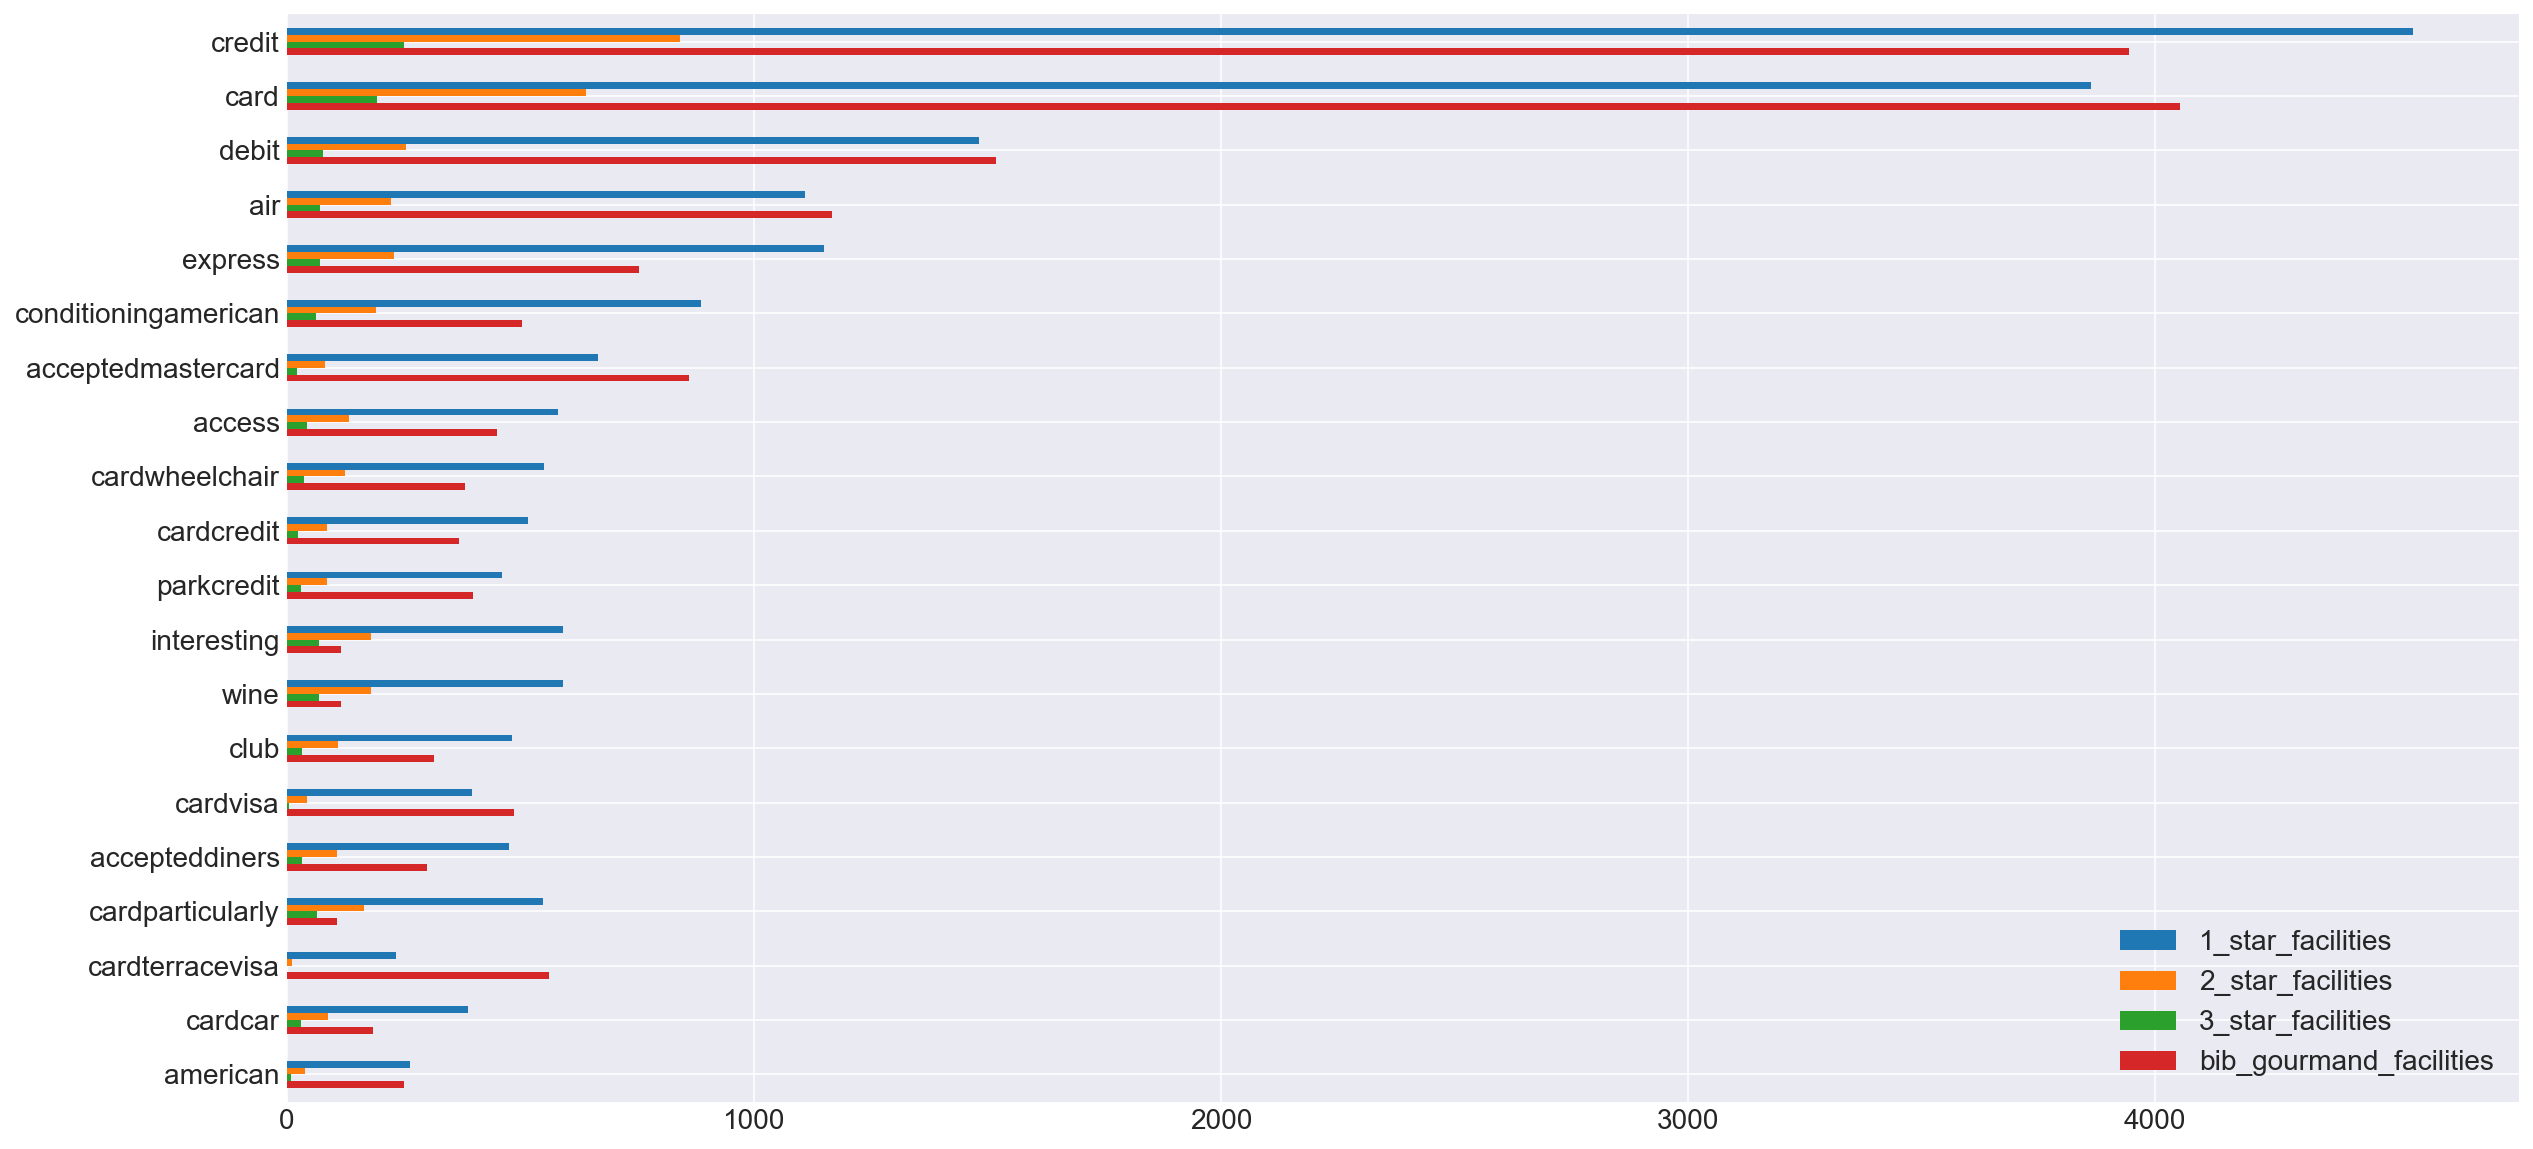

In [155]:
# Plot Top-20 Facilities Words and compare by Awards
features_list = ['1_star_facilities','2_star_facilities','3_star_facilities','bib_gourmand_facilities']

plt.rc('font', size=14)
word_counts.sort_values('all_facilities', ascending=False)[features_list].head(20).plot.barh()
plt.gca().invert_yaxis()
plt.gca().invert_yaxis()
plt.gca().invert_yaxis()
plt.show()

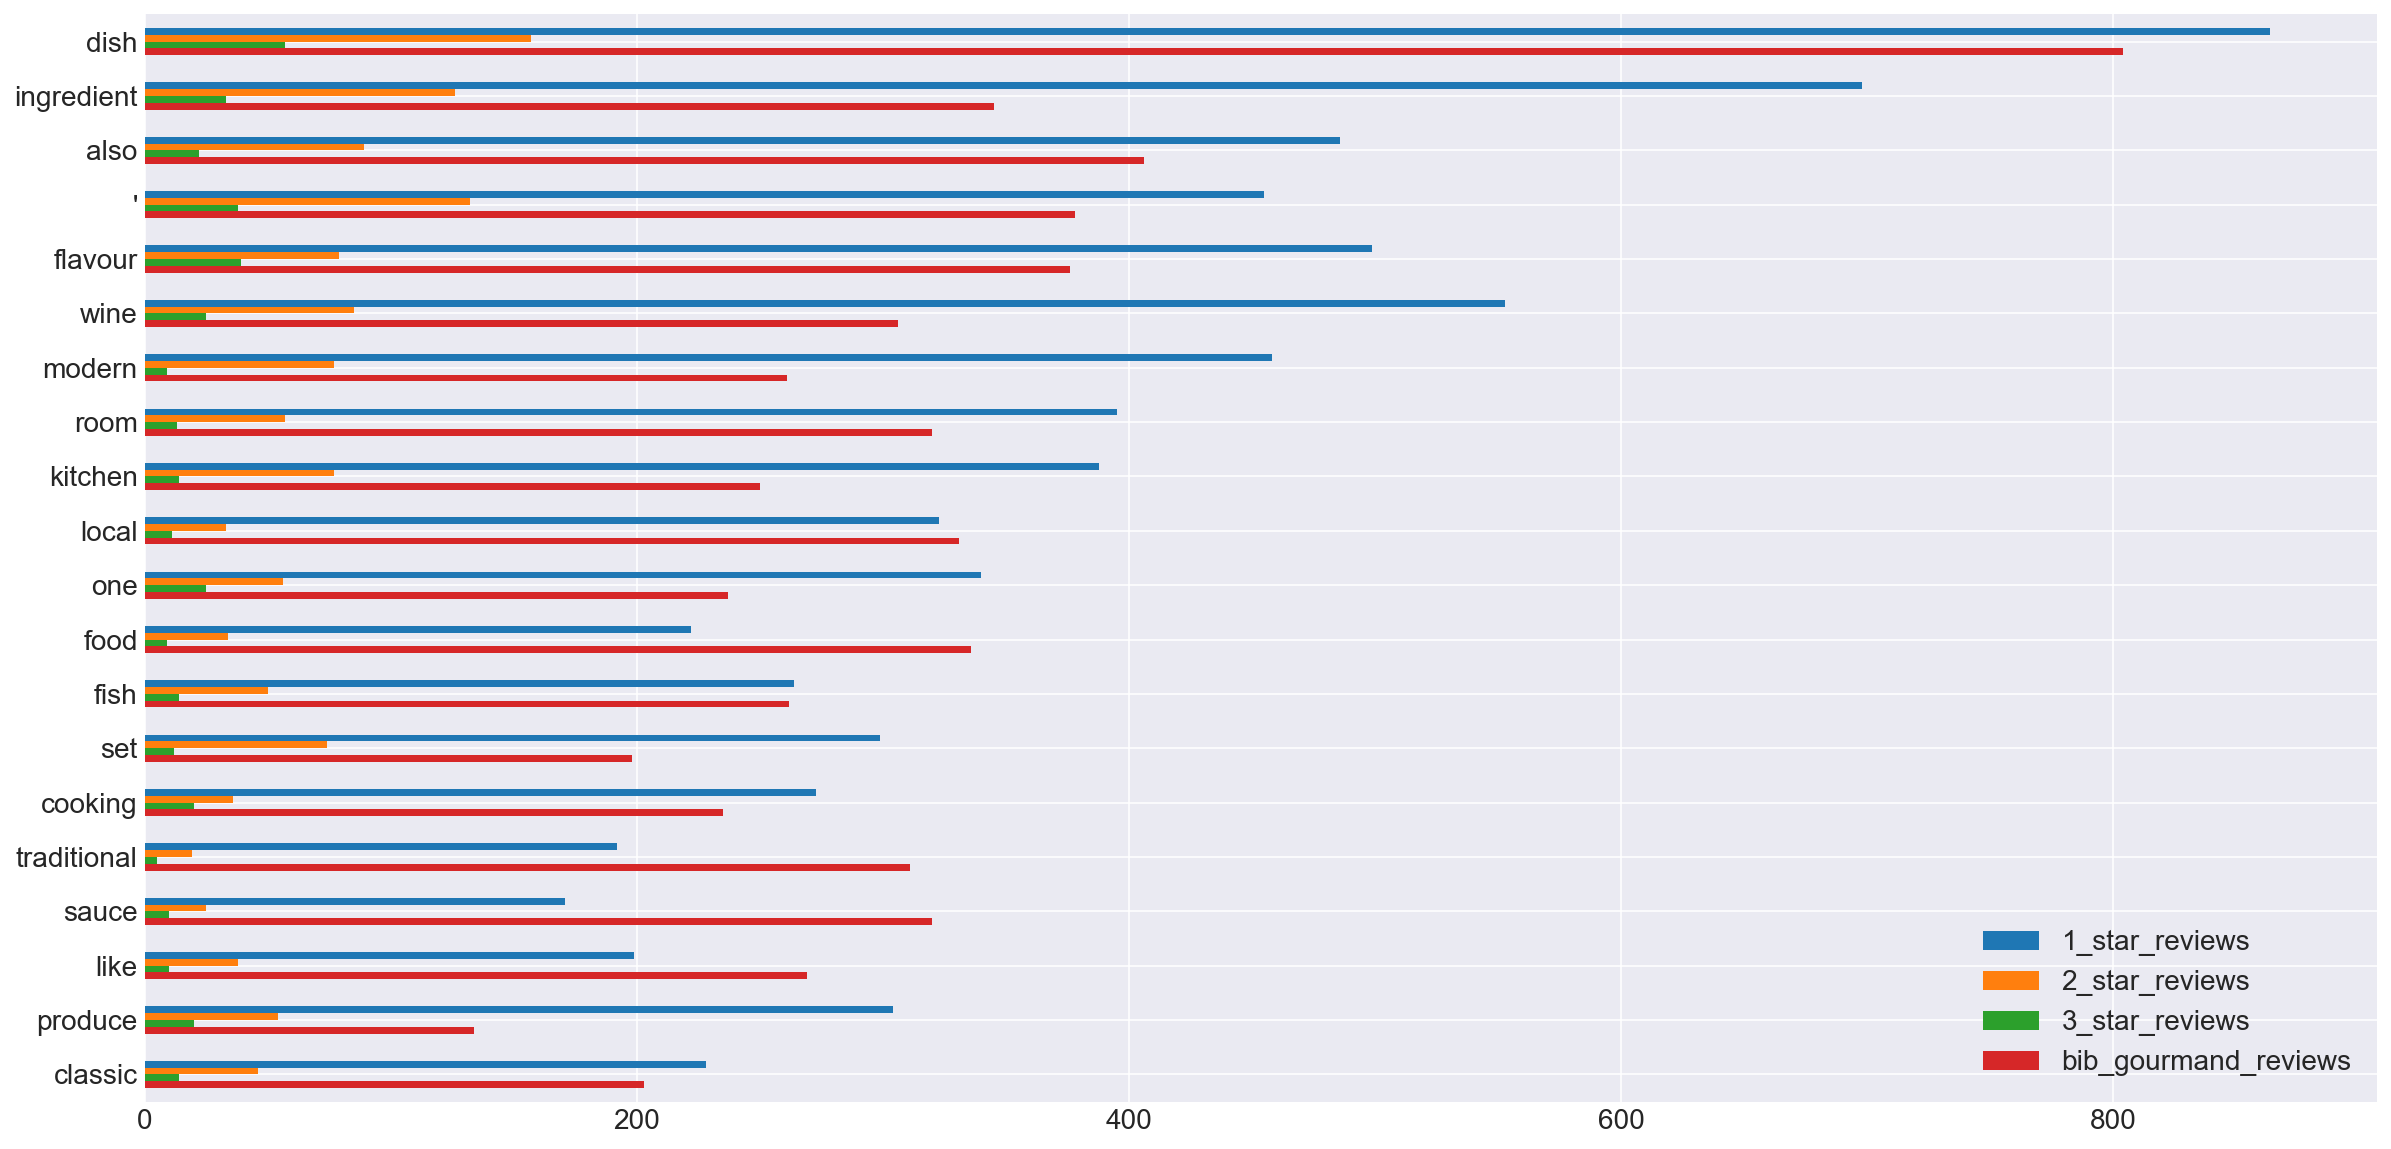

In [152]:
# Plot Top-20 Review Words and compare by Awards
features_list = ['1_star_reviews','2_star_reviews','3_star_reviews','bib_gourmand_reviews']

plt.rc('font', size=14)
word_counts.sort_values('all_reviews', ascending=False)[features_list].head(20).plot.barh()
plt.gca().invert_yaxis()
plt.show()

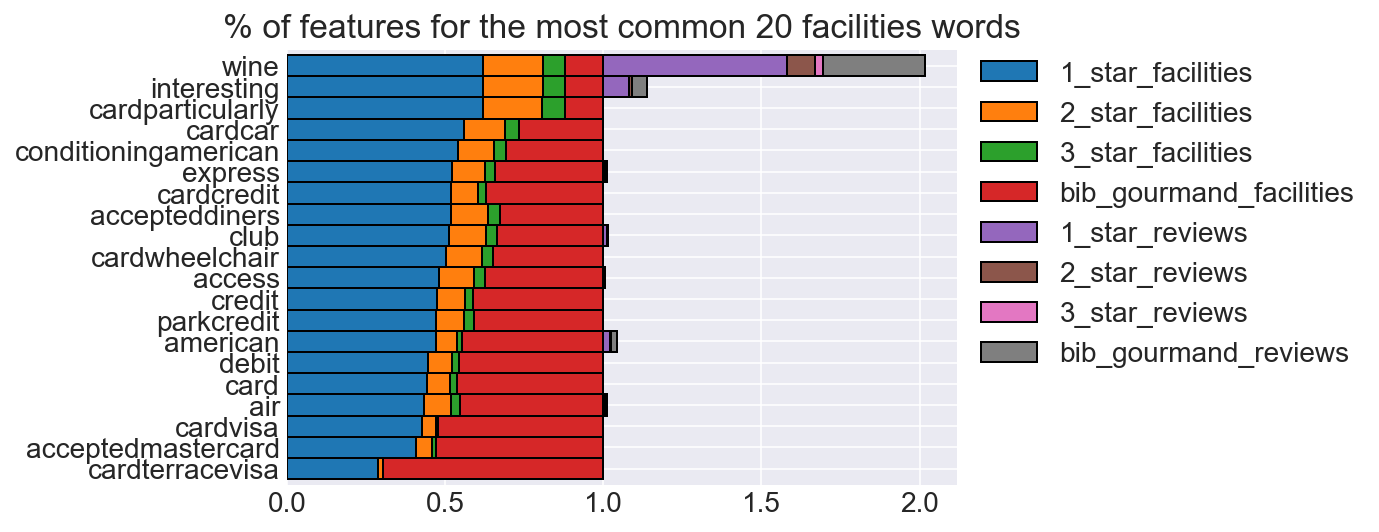

In [122]:
## visually compare features by the top 20 most frequent facility words
plt.rc('font', size=14)

(word_counts.sort_values('all_facilities', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all_facilities'], axis = 1)
 .drop(columns = ['all_facilities','all_reviews'])
 .sort_values(by = features_list)
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False)
)
plt.title('% of features for the most common 20 facilities words')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

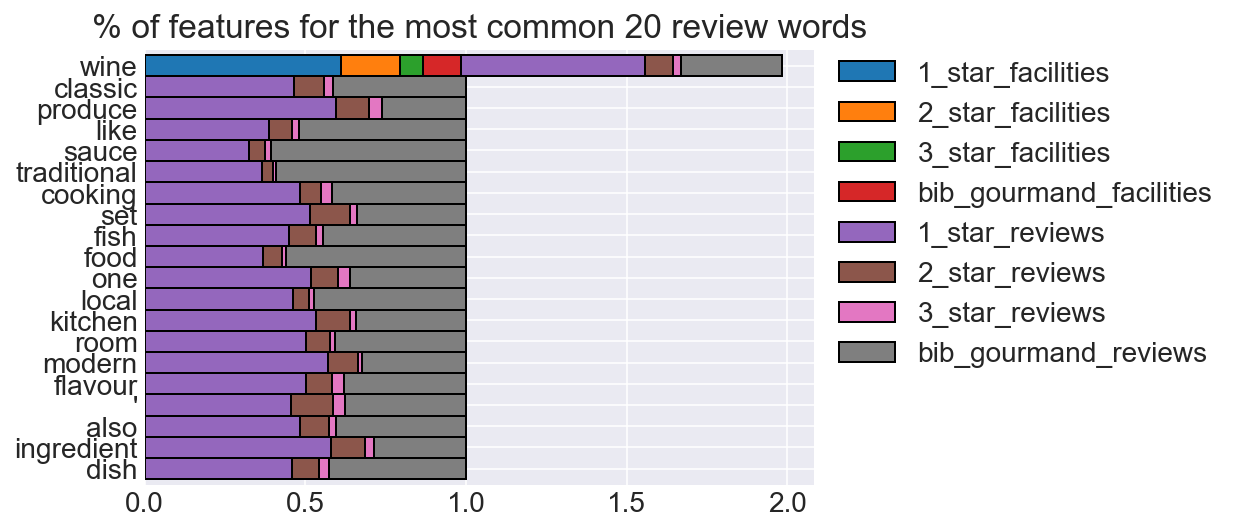

In [123]:
## visually compare features by the top 20 most frequent review words
plt.rc('font', size=14)

(word_counts.sort_values('all_reviews', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all_reviews'], axis = 1)
 .drop(columns = ['all_facilities','all_reviews'])
 .sort_values(by = features_list)
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False)
)
plt.title('% of features for the most common 20 review words')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# N-Grams

### Bi-Grams

In [125]:
# Display Bi-Gram using ngram code
list(nltk.ngrams(all_reviews_words, 2))

[('charm', 'country'),
 ('country', 'house'),
 ('house', 'make'),
 ('make', 'felt'),
 ('felt', 'approach'),
 ('approach', 'via'),
 ('via', 'small'),
 ('small', 'bridge'),
 ('bridge', 'safe'),
 ('safe', 'say'),
 ('say', 'character'),
 ('character', 'idyllic'),
 ('idyllic', 'old'),
 ('old', 'mill'),
 ('mill', 'successfully'),
 ('successfully', 'preserved'),
 ('preserved', 'ruth'),
 ('ruth', 'harald'),
 ('harald', 'russel'),
 ('russel', 'clearly'),
 ('clearly', 'put'),
 ('put', 'heart'),
 ('heart', 'soul'),
 ('soul', 'running'),
 ('running', 'hotel'),
 ('hotel', 'chefpatron'),
 ('chefpatron', 'talented'),
 ('talented', 'kitchen'),
 ('kitchen', 'team'),
 ('team', 'propose'),
 ('propose', 'five'),
 ('five', 'sevencourse'),
 ('sevencourse', 'set'),
 ('set', 'diner'),
 ('diner', 'quality'),
 ('quality', 'ingredient'),
 ('ingredient', 'prefer'),
 ('prefer', 'source'),
 ('source', 'local'),
 ('local', 'producer'),
 ('producer', 'even'),
 ('even', 'hunt'),
 ('hunt', 'game'),
 ('game', 'classical

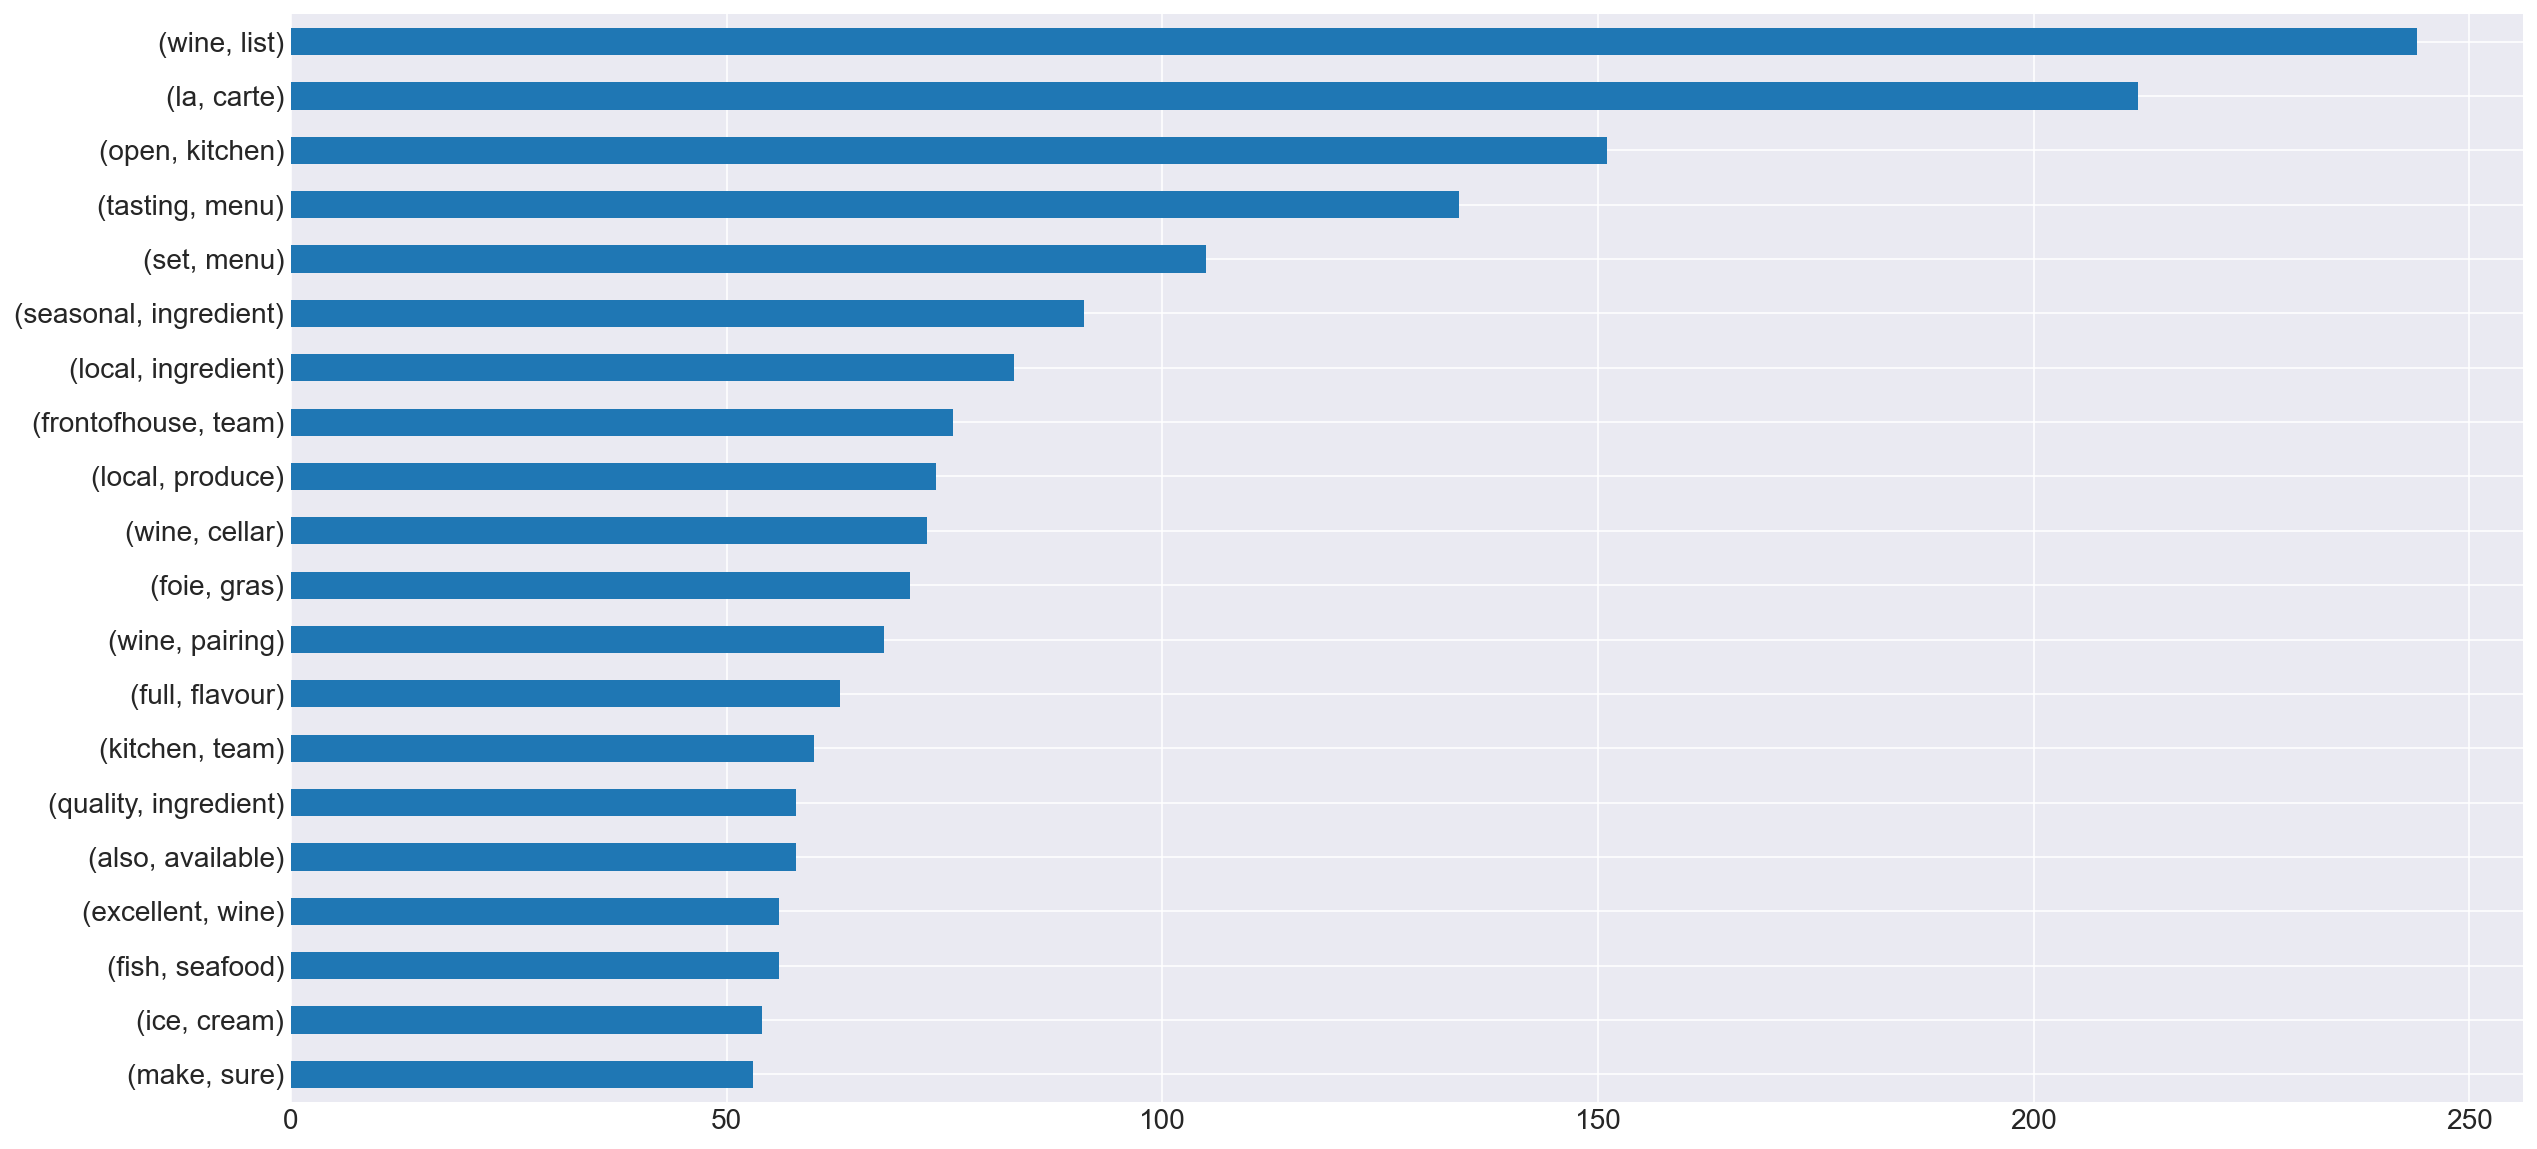

In [151]:
# Display top 10 bigram pairs for All Review words
pd.Series(nltk.bigrams(all_reviews_words)
         ).value_counts().head(20).plot.barh()
plt.gca().invert_yaxis()

In [127]:
# Create Bi-Gram Variables
all_reviews_2_gram = list(nltk.ngrams(all_reviews_words, 2))
one_star_reviews_2_gram = list(nltk.ngrams(one_star_reviews_words, 2))
two_star_reviews_2_gram = list(nltk.ngrams(two_star_reviews_words, 2))
three_star_reviews_2_gram = list(nltk.ngrams(three_star_reviews_words, 2))
bib_gourmand_reviews_2_gram = list(nltk.ngrams(bib_gourmand_reviews_words, 2))

# Create Bi-Gram Variables
all_facilities_2_gram = list(nltk.ngrams(all_facilities_words, 2))
one_star_facilities_2_gram = list(nltk.ngrams(one_star_facilities_words, 2))
two_star_facilities_2_gram = list(nltk.ngrams(two_star_facilities_words, 2))
three_star_facilities_2_gram = list(nltk.ngrams(three_star_facilities_words, 2))
bib_gourmand_facilities_2_gram = list(nltk.ngrams(bib_gourmand_facilities_words, 2))

<function matplotlib.pyplot.show(close=None, block=None)>

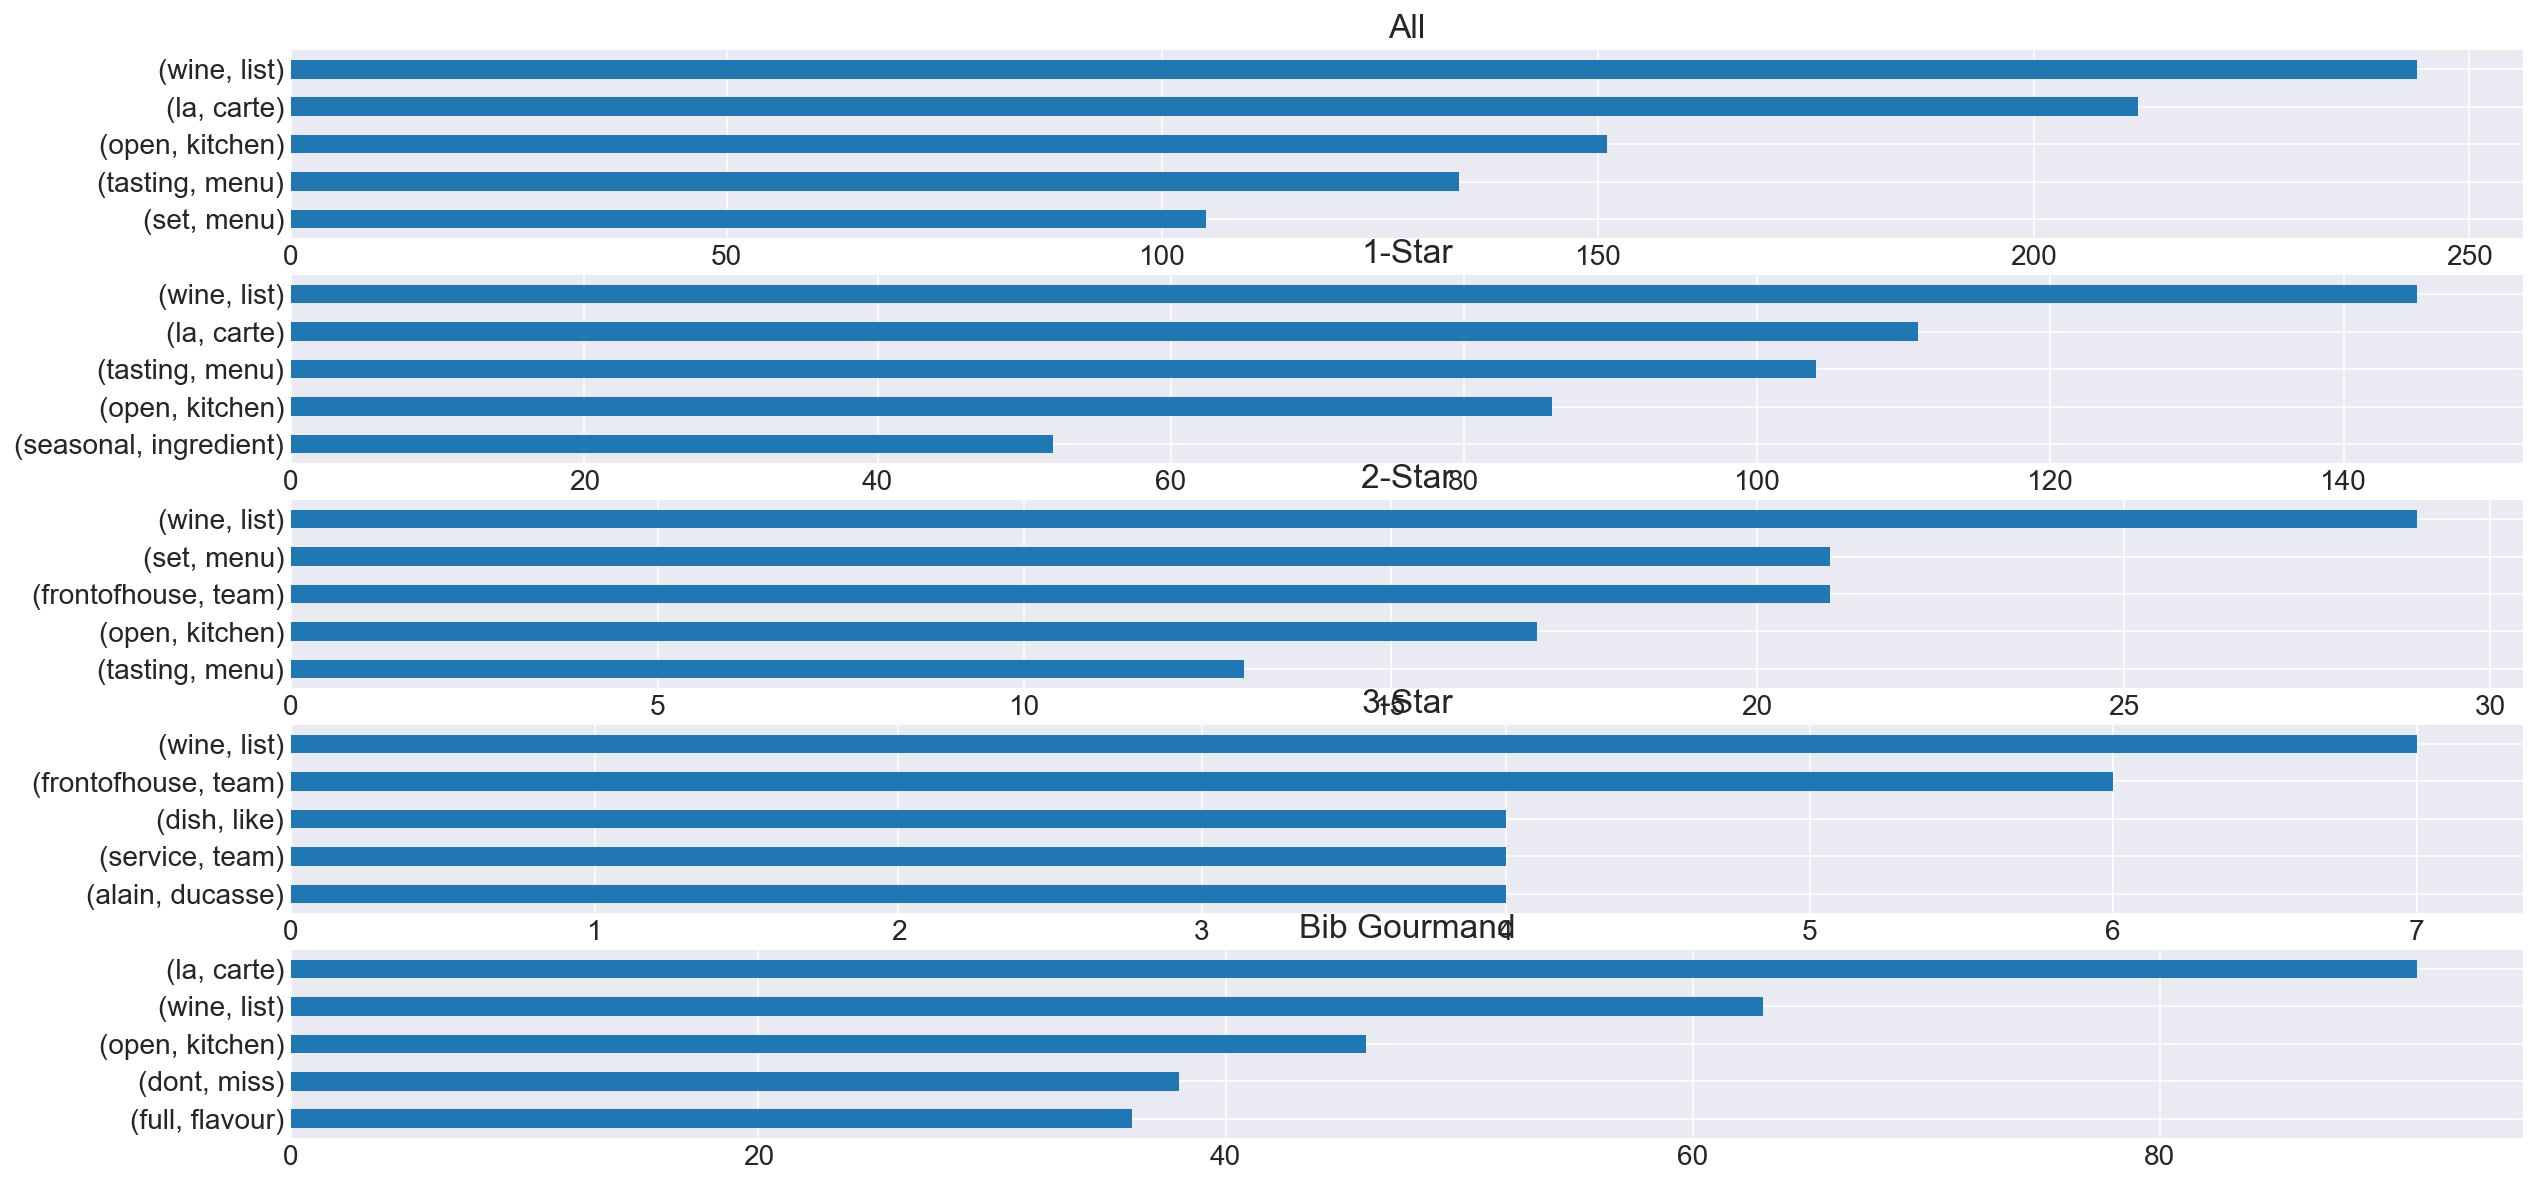

In [150]:
# Display top 5 Review bigram pairs for awards

plt.subplot(5,1,1)
pd.Series(all_reviews_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('All')

plt.subplot(5,1,2)
pd.Series(one_star_reviews_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('1-Star')

plt.subplot(5,1,3)
pd.Series(two_star_reviews_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('2-Star')

plt.subplot(5,1,4)
pd.Series(three_star_reviews_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('3-Star')

plt.subplot(5,1,5)
pd.Series(bib_gourmand_reviews_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('Bib Gourmand')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

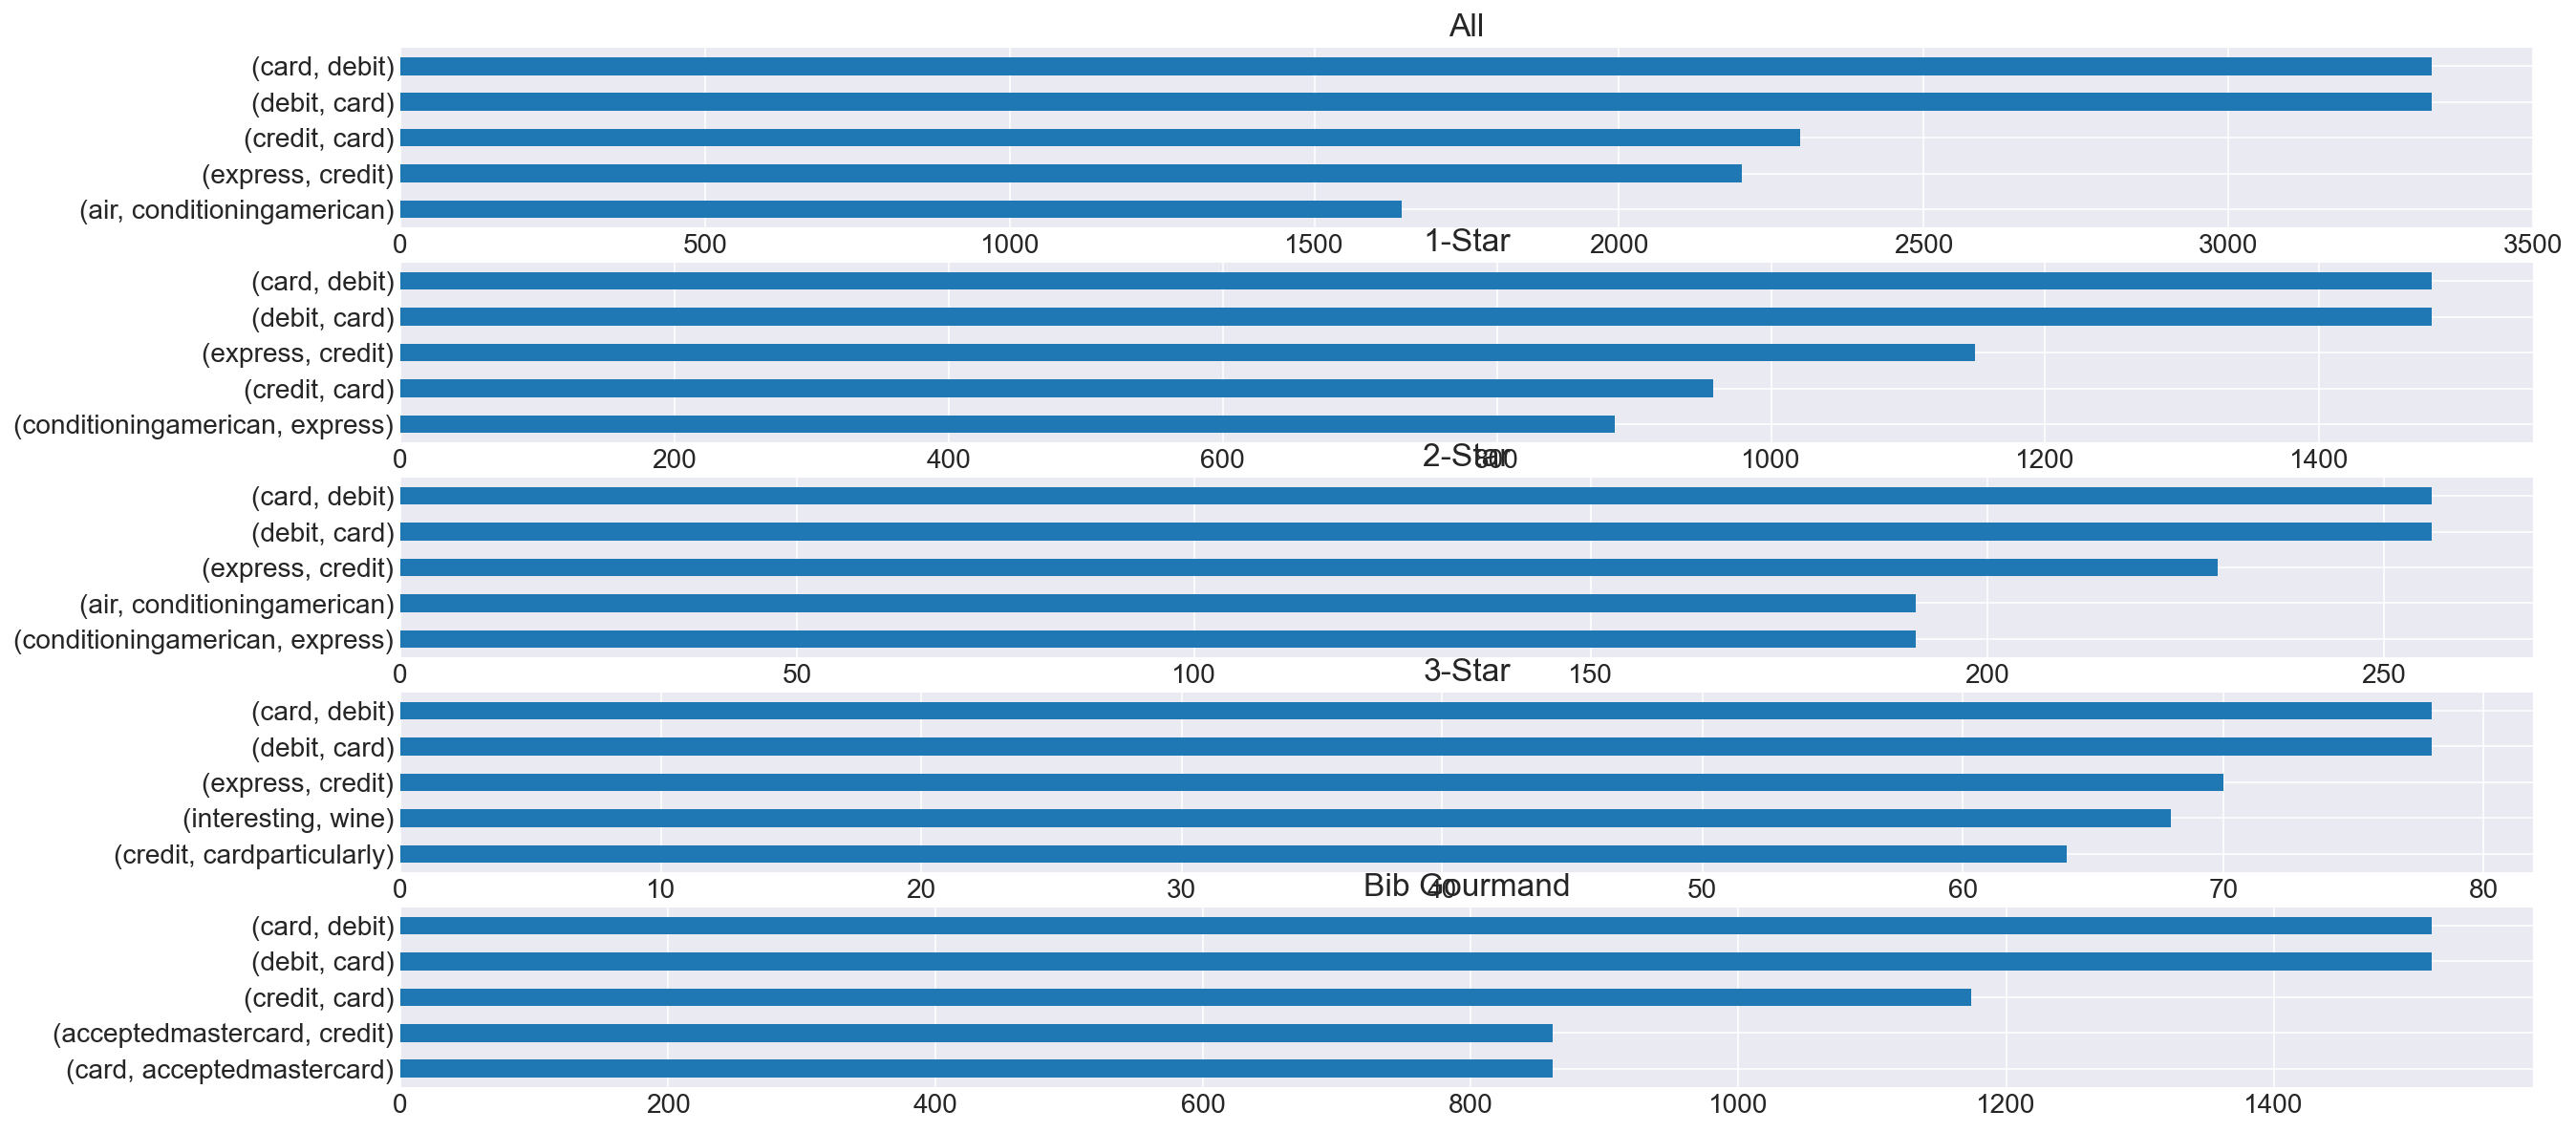

In [149]:
# Display top 5 Facilities bigram pairs for awards

plt.subplot(5,1,1)
pd.Series(all_facilities_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('All')

plt.subplot(5,1,2)
pd.Series(one_star_facilities_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('1-Star')

plt.subplot(5,1,3)
pd.Series(two_star_facilities_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('2-Star')

plt.subplot(5,1,4)
pd.Series(three_star_facilities_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('3-Star')

plt.subplot(5,1,5)
pd.Series(bib_gourmand_facilities_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('Bib Gourmand')

plt.show

### Tri-Grams

In [131]:
# Display Tri-Gram using ngram code
list(nltk.ngrams(all_reviews_words, 3))

[('charm', 'country', 'house'),
 ('country', 'house', 'make'),
 ('house', 'make', 'felt'),
 ('make', 'felt', 'approach'),
 ('felt', 'approach', 'via'),
 ('approach', 'via', 'small'),
 ('via', 'small', 'bridge'),
 ('small', 'bridge', 'safe'),
 ('bridge', 'safe', 'say'),
 ('safe', 'say', 'character'),
 ('say', 'character', 'idyllic'),
 ('character', 'idyllic', 'old'),
 ('idyllic', 'old', 'mill'),
 ('old', 'mill', 'successfully'),
 ('mill', 'successfully', 'preserved'),
 ('successfully', 'preserved', 'ruth'),
 ('preserved', 'ruth', 'harald'),
 ('ruth', 'harald', 'russel'),
 ('harald', 'russel', 'clearly'),
 ('russel', 'clearly', 'put'),
 ('clearly', 'put', 'heart'),
 ('put', 'heart', 'soul'),
 ('heart', 'soul', 'running'),
 ('soul', 'running', 'hotel'),
 ('running', 'hotel', 'chefpatron'),
 ('hotel', 'chefpatron', 'talented'),
 ('chefpatron', 'talented', 'kitchen'),
 ('talented', 'kitchen', 'team'),
 ('kitchen', 'team', 'propose'),
 ('team', 'propose', 'five'),
 ('propose', 'five', 'seven

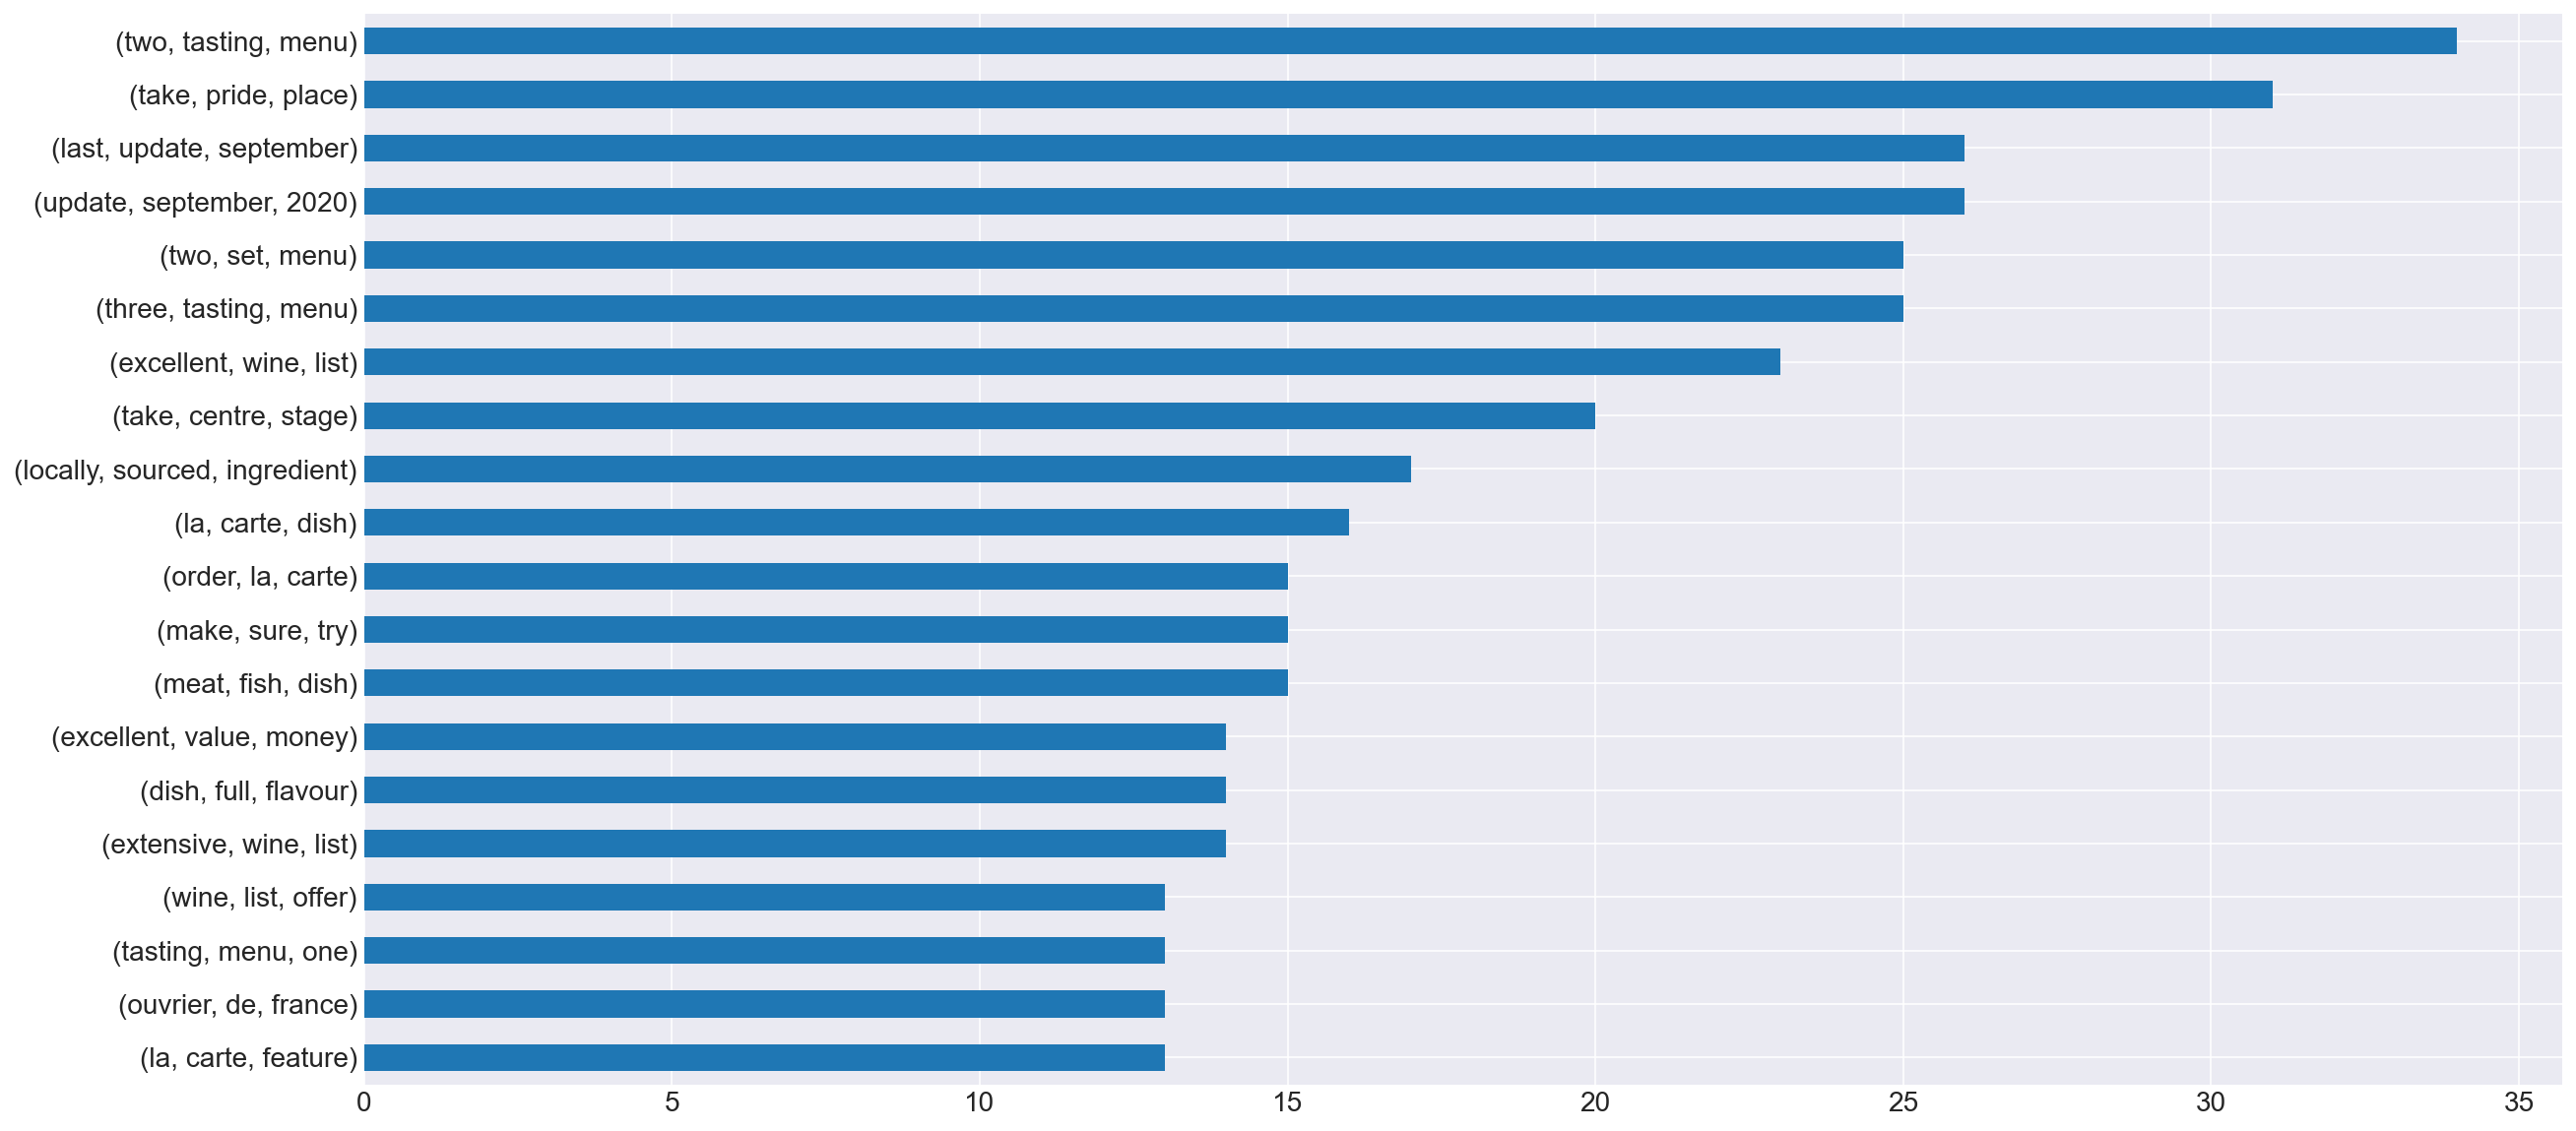

In [148]:
# Display top 10 Trigram groups for All Review words
pd.Series(nltk.ngrams(all_reviews_words, 3)
         ).value_counts().head(20).plot.barh()
plt.gca().invert_yaxis()

In [133]:
# Create Tri-Gram Variables
all_reviews_3_gram = list(nltk.ngrams(all_reviews_words, 3))
one_star_reviews_3_gram = list(nltk.ngrams(one_star_reviews_words, 3))
two_star_reviews_3_gram = list(nltk.ngrams(two_star_reviews_words, 3))
three_star_reviews_3_gram = list(nltk.ngrams(three_star_reviews_words, 3))
bib_gourmand_reviews_3_gram = list(nltk.ngrams(bib_gourmand_reviews_words, 3))

# Create Tri-Gram Variables
all_facilities_3_gram = list(nltk.ngrams(all_facilities_words, 3))
one_star_facilities_3_gram = list(nltk.ngrams(one_star_facilities_words, 3))
two_star_facilities_3_gram = list(nltk.ngrams(two_star_facilities_words, 3))
three_star_facilities_3_gram = list(nltk.ngrams(three_star_facilities_words, 3))
bib_gourmand_facilities_3_gram = list(nltk.ngrams(bib_gourmand_facilities_words, 3))

<function matplotlib.pyplot.show(close=None, block=None)>

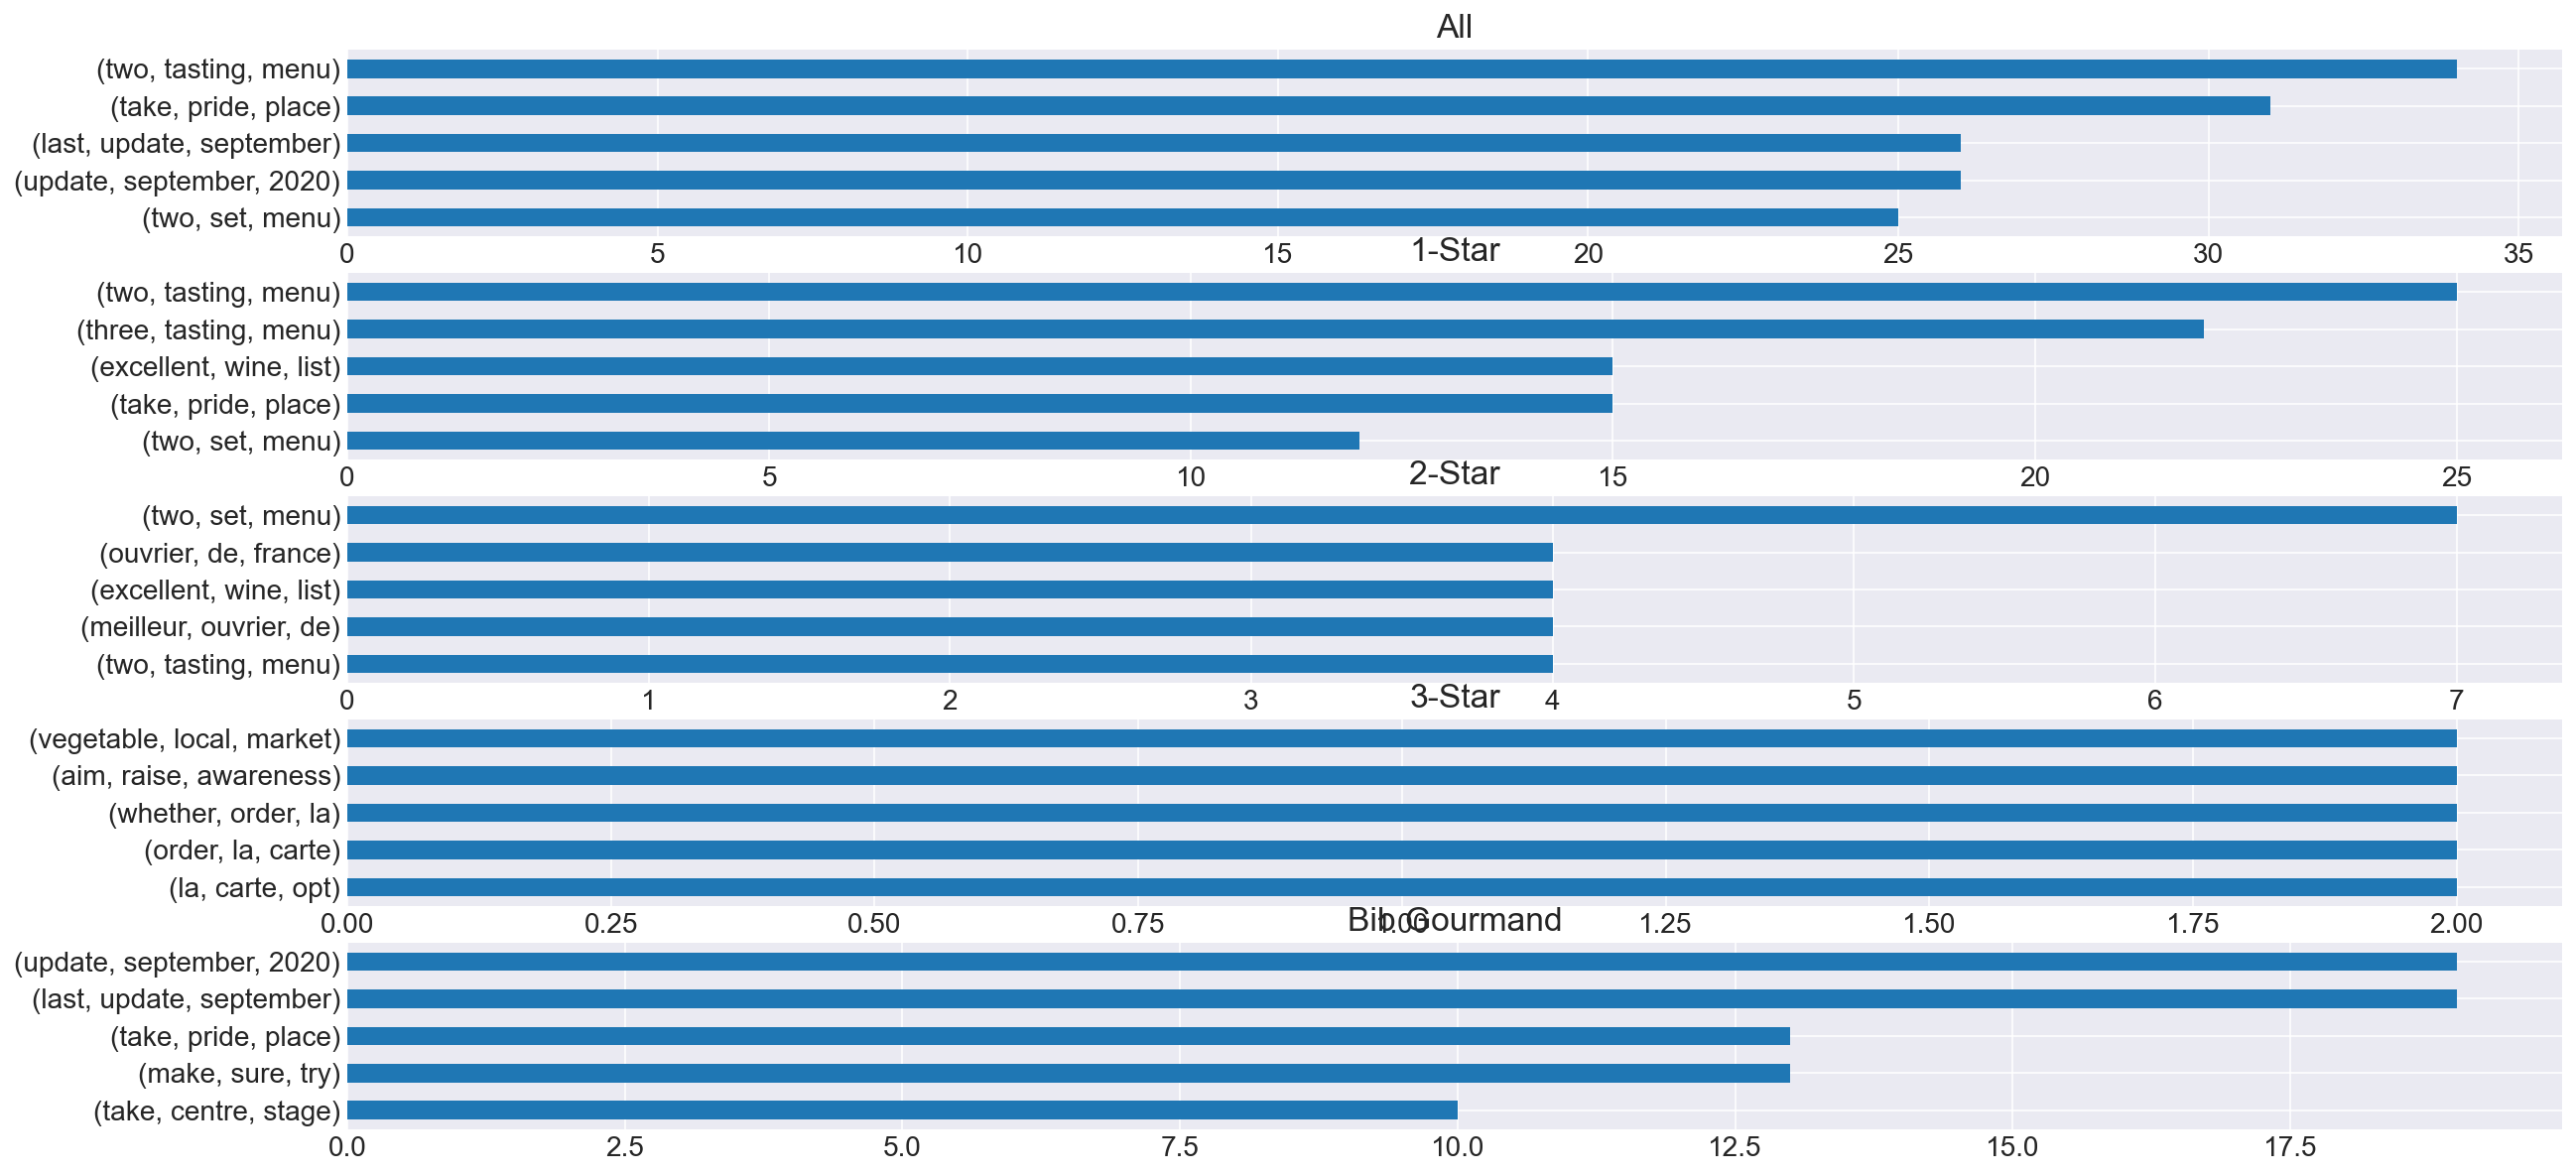

In [147]:
# Display top 5 Review Trigram groups for awards

plt.subplot(5,1,1)
pd.Series(all_reviews_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('All')

plt.subplot(5,1,2)
pd.Series(one_star_reviews_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('1-Star')

plt.subplot(5,1,3)
pd.Series(two_star_reviews_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('2-Star')

plt.subplot(5,1,4)
pd.Series(three_star_reviews_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('3-Star')

plt.subplot(5,1,5)
pd.Series(bib_gourmand_reviews_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('Bib Gourmand')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

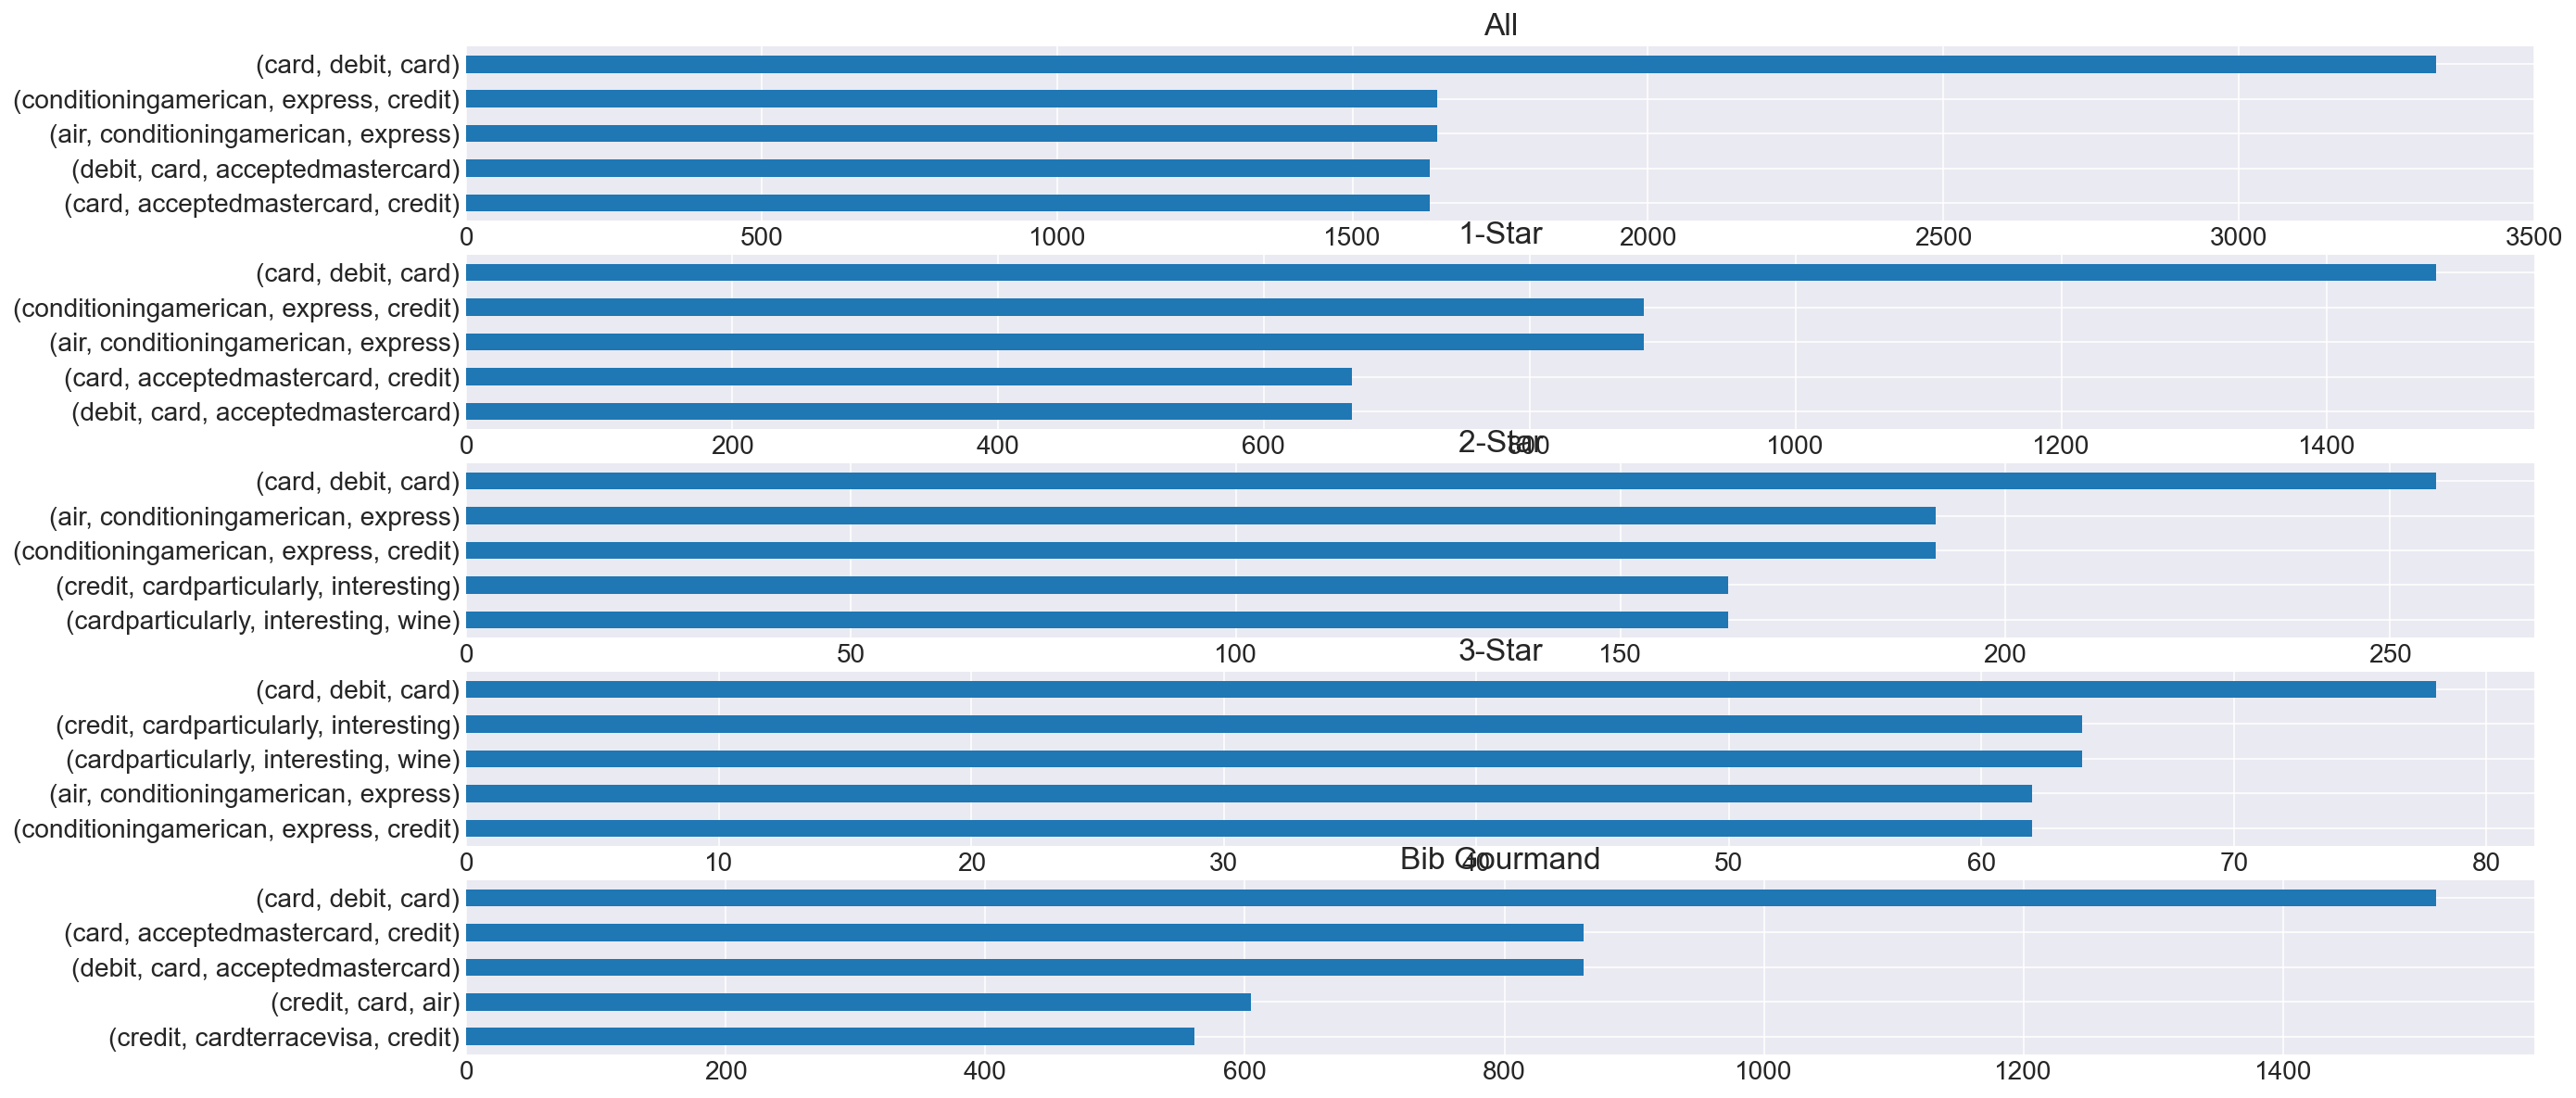

In [146]:
# Display top 5 Facilities Trigram groups for awards

plt.subplot(5,1,1)
pd.Series(all_facilities_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('All')

plt.subplot(5,1,2)
pd.Series(one_star_facilities_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('1-Star')

plt.subplot(5,1,3)
pd.Series(two_star_facilities_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('2-Star')

plt.subplot(5,1,4)
pd.Series(three_star_facilities_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('3-Star')

plt.subplot(5,1,5)
pd.Series(bib_gourmand_facilities_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('Bib Gourmand')

plt.show

# WordClouds

In [138]:
from wordcloud import WordCloud

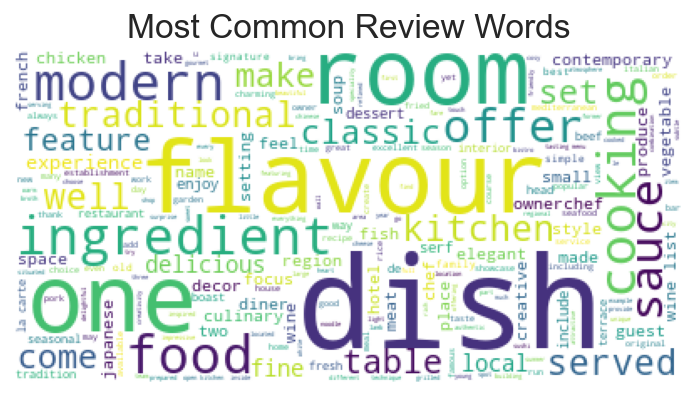

In [139]:
# making a word cloud:
# call WordCloud.generate 
# reference a string with all words, not a
# list or series
# call plt.imshow on the generation from wordcloud
img = WordCloud(background_color='white'
               ).generate(' '.join(all_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Review Words')
plt.show()

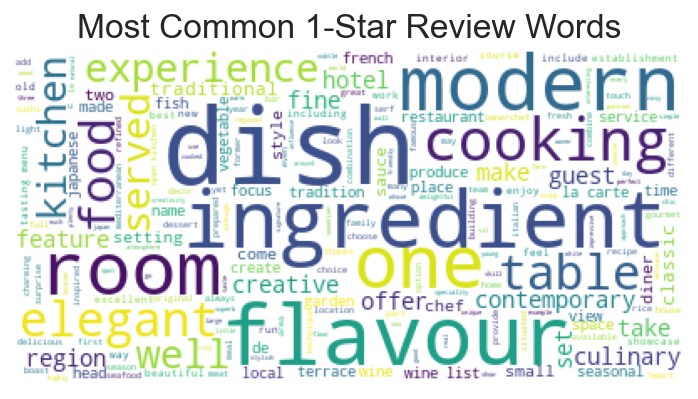

In [141]:
# making a word cloud:
# call WordCloud.generate 
# reference a string with all words, not a
# list or series
# call plt.imshow on the generation from wordcloud
img = WordCloud(background_color='white'
               ).generate(' '.join(one_star_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common 1-Star Review Words')
plt.show()

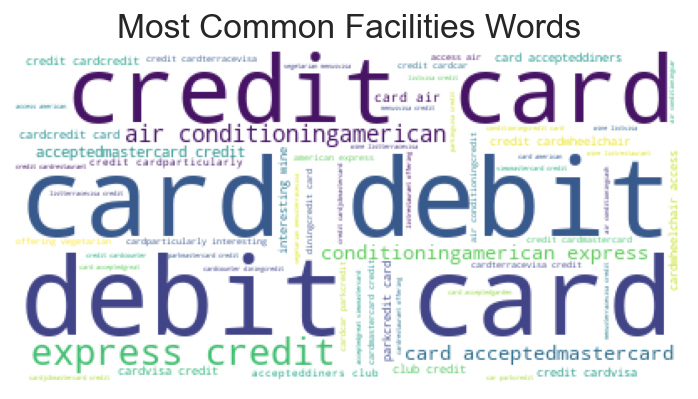

In [140]:
# making a word cloud:
# call WordCloud.generate 
# reference a string with all words, not a
# list or series
# call plt.imshow on the generation from wordcloud
img = WordCloud(background_color='white'
               ).generate(' '.join(all_facilities_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Facilities Words')
plt.show()

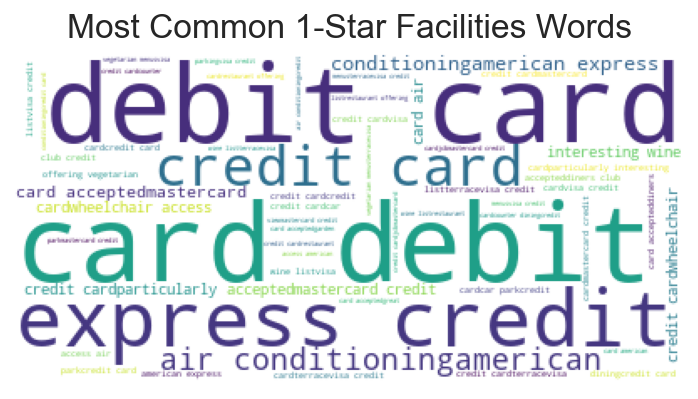

In [142]:
# making a word cloud:
# call WordCloud.generate 
# reference a string with all words, not a
# list or series
# call plt.imshow on the generation from wordcloud
img = WordCloud(background_color='white'
               ).generate(' '.join(one_star_facilities_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common 1-Star Facilities Words')
plt.show()

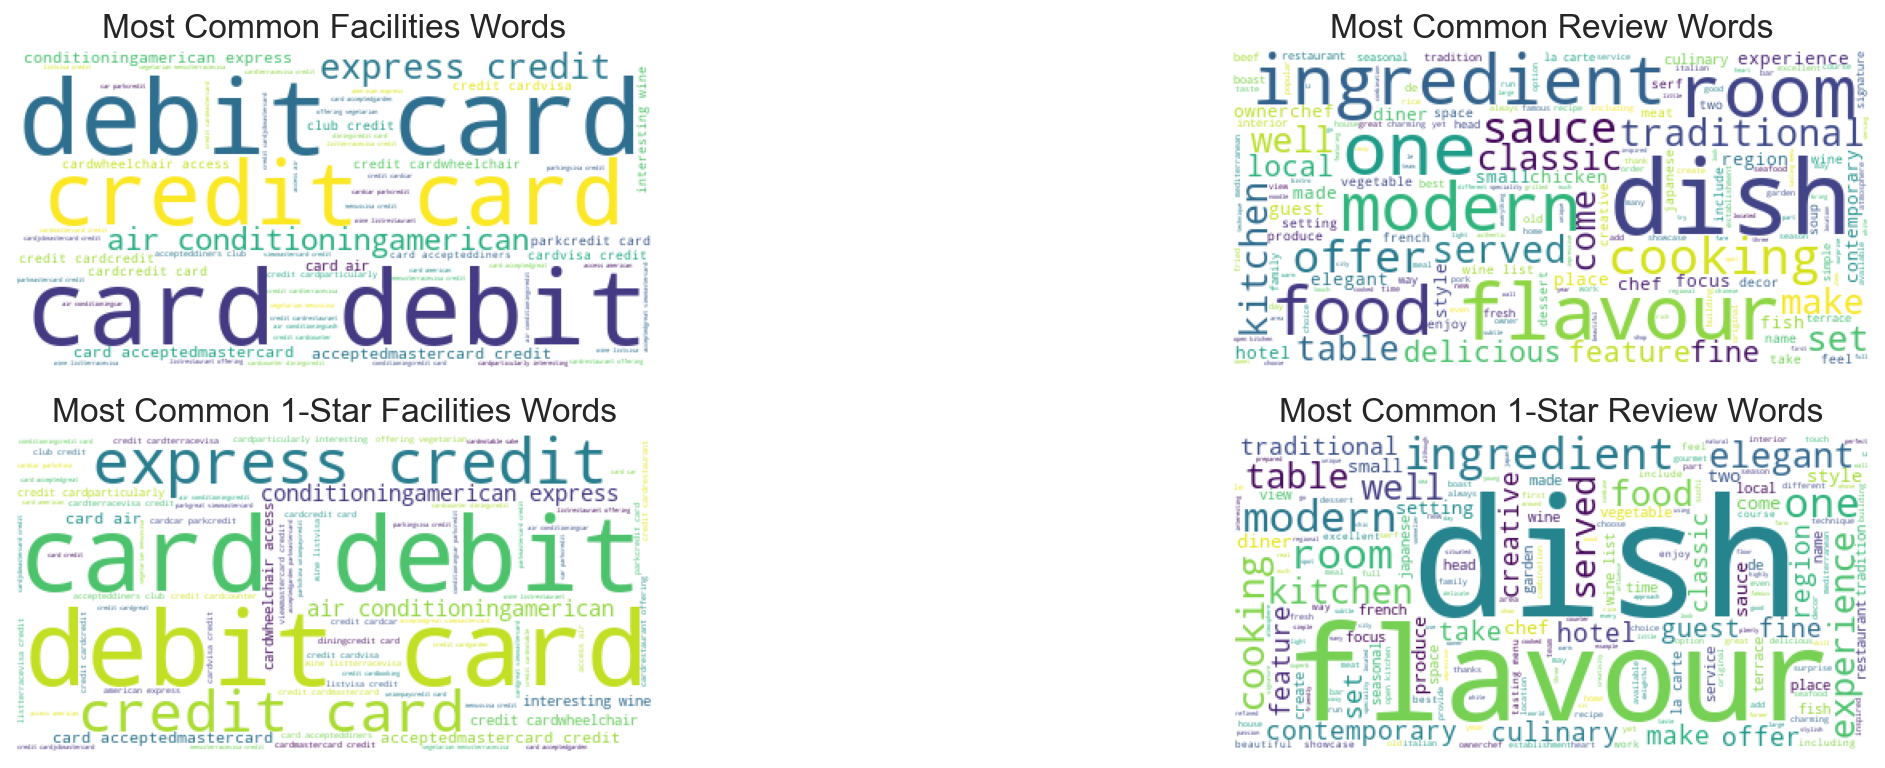

In [145]:
# making multiple word clouds:

plt.rc('figure', figsize=(20, 10))

plt.subplot(3,2,1)
img = WordCloud(background_color='white'
               ).generate(' '.join(all_facilities_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Facilities Words')

plt.subplot(3,2,2)
img = WordCloud(background_color='white'
               ).generate(' '.join(all_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Review Words')

plt.subplot(3,2,3)
img = WordCloud(background_color='white'
               ).generate(' '.join(one_star_facilities_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common 1-Star Facilities Words')

plt.subplot(3,2,4)
img = WordCloud(background_color='white'
               ).generate(' '.join(one_star_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common 1-Star Review Words')

plt.show()